In [1345]:
!pip install tsfresh

  Created wheel for toolz: filename=toolz-0.10.0-py3-none-any.whl size=55579 sha256=9e9aec450cced0a1d31cbf2154eadee3d8895af4e9072491b72aef2b41501a81
  Stored in directory: c:\users\desconhecido\appdata\local\pip\cache\wheels\a5\2b\b5\05758d5828d65f2adef8fbb5d5484e4adb946ae1827a973a01
  Created wheel for locket: filename=locket-0.2.0-py3-none-any.whl size=4045 sha256=0e035e80035f3ee18e1bfa7d94482aa4c1ba3a8f3f7fdc27b7fd45315d50b60f
  Stored in directory: c:\users\desconhecido\appdata\local\pip\cache\wheels\78\25\55\fd7749af1f37730049bf1c0c0f4efd755c4ab1399f29578436
Successfully built toolz locket



You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [1351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import impyute.imputation as imp
from statsmodels.tsa.stattools import adfuller
import statistics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import DecomposeResult
plt.rcParams['figure.figsize'] = [40, 10]
import tsfresh as ts
from pandas.plotting import autocorrelation_plot

In [1352]:
ts.sum_values(dados_medios_completados_2017)

AttributeError: module 'tsfresh' has no attribute 'sum_values'

In [1355]:
def ano_bisexto(ano):
    nome_eixo_x = pd.DataFrame({'Dia':[]})
    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-01-0'+str(i)},ignore_index=True)    
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-01-'+str(i)},ignore_index=True)            

    for i in range(1,30):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-02-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-02-'+str(i)},ignore_index=True)           

    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-03-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-03-'+str(i)},ignore_index=True)   


    for i in range(1,31):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-04-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-04-'+str(i)},ignore_index=True)   

    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-05-0'+str(i)},ignore_index=True)       
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-05-'+str(i)},ignore_index=True)       

    for i in range(1,31):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-06-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-06-'+str(i)},ignore_index=True)


    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-07-0'+str(i)},ignore_index=True)       
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-07-'+str(i)},ignore_index=True)

    return nome_eixo_x


def ano_normal(ano):
    nome_eixo_x = pd.DataFrame({'Dia':[]})
    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-01-0'+str(i)},ignore_index=True)    
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-01-'+str(i)},ignore_index=True)            

    for i in range(1,29):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-02-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-02-'+str(i)},ignore_index=True)           

    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-03-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-03-'+str(i)},ignore_index=True)   


    for i in range(1,31):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-04-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-04-'+str(i)},ignore_index=True)   

    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-05-0'+str(i)},ignore_index=True)       
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-05-'+str(i)},ignore_index=True)       

    for i in range(1,31):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-06-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-06-'+str(i)},ignore_index=True)


    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-07-0'+str(i)},ignore_index=True)       
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-07-'+str(i)},ignore_index=True)

    return nome_eixo_x

# Função para completar os dados faltantes
def completa_serie(dados,ano):
    print('-'*50)
    print('-'*24,ano,'-'*20)
    print('-'*50)
    
    # Reseta o index da série para ser por linha
    miss_dados = dados.isna().sum().sum()/(dados.shape[0]*dados.shape[1])*100
    print(f'{miss_dados.round(2)}% dos dados da bases são faltantes')
    
    # Completa os dados por Expect Maximization(EM)
    dados_filled = imp.cs.em(dados.values,loops=50)    
    d = [str(i) for i in range(1,25)]
    dados_completados = pd.DataFrame(data=dados_filled.round(0),columns=d)
    
    # Dados completados por EM
    print('*'*40,'  Base de dados completada  ','*'*40)
    display(dados_completados.head())

    # Formato da base dados
    print('*'*40,'  Formato da base dados  ','*'*40)
    display(dados_completados.shape)

    # Média diária dos dados
    print('*'*40,'Média diária dos dados','*'*40)
    dados_medios_completados = dados_completados.mean(axis='columns')
    display(dados_medios_completados)
    
    return dados_medios_completados

# Aplicar o Teste de Dickey-Fuller
def teste_estacionariedade(serie_temporal):
    
    #Teste estatístico
    print('Resultados do teste Dickey Fuller:')
    dftest = adfuller(serie_temporal.values)
    p_value = dftest[1]
    dfoutput = pd.Series(dftest[0:4], index=['Teste estatístico(t stat)','p-value','#Lags Usados','Número de observações usadas'])
    for key,value in dftest[4].items():
        dfoutput['Valores críticos (%s)'%key] = value
    print(dfoutput)

def MAPE(serie_suavizada,serie_original):
    return sum(abs((serie_suavizada-serie_original)*100)/serie_original)/serie_suavizada.shape[0]

def MQE(serie_suavizada,serie_original):
    return sum(pow(serie_suavizada-serie_original,2))/serie_suavizada.shape[0]

def MAE(serie_suavizada,serie_original):
    return sum(abs(serie_suavizada-serie_original))/serie_suavizada.shape[0]


def alisar_serie(serie_temporal_n_tratada,alpha=0.3):
    df_modelo_suavisado,df_suavisado = pd.DataFrame({}),pd.DataFrame({})
    vMAPE,vMAE,vMQE = [],[],[]
    modelo_suavisado = [serie_temporal_n_tratada[0]] # first value is same as series
    for n in range(1, len(serie_temporal_n_tratada)):
        modelo_suavisado.append(alpha * serie_temporal_n_tratada[n] + (1 - alpha) * modelo_suavisado[n-1])                
    df_suavisado = df_suavisado.append(modelo_suavisado,ignore_index=True)

    #Plotar valores para verficar visualmente
    plt.figure(figsize=(40,5))
    st_plot = plt.plot(serie_temporal_n_tratada,'*-', color='red',label='Original')
    st_plot = plt.plot(df_suavisado,'*-', color='blue',label='Suavizado')
    plt.legend(loc='best')
    plt.show(block=False)
    
    return df_suavisado



def remove_sazonalidade(serie_temporal_suavizada):
        
    decomp = seasonal_decompose(serie_temporal_suavizada,
                                 model='additive',
                                 period=35, extrapolate_trend='freq')

    serie_estacionaria = (serie_temporal_suavizada.T -decomp.trend).T
    serie_estacionaria.dropna(inplace=True)

    teste_estacionariedade(serie_estacionaria)
    
    decomp_novamente = seasonal_decompose(serie_estacionaria,
                                          model='additive',
                                          period=35, extrapolate_trend='freq')
    decomp_novamente.plot();
        
    return serie_estacionaria



# Etapa 1: Carregar os dados

In [1296]:
dados2016 = pd.read_csv('..\/01.Dados\/CSV\/CO_Osasco_2016.csv')
dados2017 = pd.read_csv('..\/01.Dados\/CSV\/CO_Osasco_2017.csv')
dados2018 = pd.read_csv('..\/01.Dados\/CSV\/CO_Osasco_2018.csv')
dados2019 = pd.read_csv('..\/01.Dados\/CSV\/CO_Osasco_2019.csv')
dados2020 = pd.read_csv('..\/01.Dados\/CSV\/CO_Osasco_2020.csv')

# Etapa 2: Tratamento de dados faltantes

In [1297]:
dados_medios_completados_2016 = completa_serie(dados2016,2016)
dados_medios_completados_2017 = completa_serie(dados2017,2017)
dados_medios_completados_2018 = completa_serie(dados2018,2018)
dados_medios_completados_2019 = completa_serie(dados2019,2019)
dados_medios_completados_2020 = completa_serie(dados2020,2020)

--------------------------------------------------
------------------------ 2016 --------------------
--------------------------------------------------
19.62% dos dados da bases são faltantes


c:\python38\lib\site-packages\impyute\imputation\cs\em.py:36: RuntimeWarning: Mean of empty slice.
  mu = col[~np.isnan(col)].mean()
c:\python38\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\python38\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\python38\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\python38\lib\site-packages\impyute\imputation\cs\em.py:42: RuntimeWarning: Mean of empty slice.
  mu = col[~np.isnan(col)].mean()


****************************************   Base de dados completada   ****************************************


1    2    3    4   5    6    7    8    9   10  ...   15   16   17   18  \
0  1.0  1.0  1.0  0.0 NaN  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
1  1.0  1.0  1.0  0.0 NaN  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
2  1.0  1.0  0.0  0.0 NaN  1.0  1.0  1.0  1.0  1.0  ...  1.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0 NaN  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
4  0.0  0.0  0.0  0.0 NaN  0.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   

    19   20   21   22   23   24  
0  1.0  1.0  1.0  1.0  1.0  1.0  
1  1.0  1.0  1.0  1.0  1.0  1.0  
2  1.0  1.0  1.0  1.0  1.0  0.0  
3  1.0  1.0  1.0  1.0  1.0  0.0  
4  1.0  1.0  1.0  1.0  1.0  1.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(213, 24)

**************************************** Média diária dos dados ****************************************


0      0.478261
1      0.956522
2      0.782609
3      0.782609
4      0.782609
         ...   
208    0.913043
209    0.782609
210    0.782609
211    0.956522
212    1.086957
Length: 213, dtype: float64

--------------------------------------------------
------------------------ 2017 --------------------
--------------------------------------------------
10.79% dos dados da bases são faltantes


c:\python38\lib\site-packages\impyute\imputation\cs\em.py:36: RuntimeWarning: Mean of empty slice.
  mu = col[~np.isnan(col)].mean()
c:\python38\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\python38\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\python38\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\python38\lib\site-packages\impyute\imputation\cs\em.py:42: RuntimeWarning: Mean of empty slice.
  mu = col[~np.isnan(col)].mean()


****************************************   Base de dados completada   ****************************************


1    2    3    4   5    6    7    8    9   10  ...   15   16   17   18  \
0  0.0  1.0 -0.0  0.0 NaN  1.0  1.0  2.0  2.0  1.0  ...  2.0  2.0  2.0  2.0   
1  2.0  2.0  2.0  2.0 NaN  0.0  1.0  1.0  1.0  0.0  ...  0.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0 NaN  1.0  1.0  2.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
3  0.0  0.0  0.0  0.0 NaN  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
4  0.0  0.0  0.0  0.0 NaN  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  1.0  1.0   

    19   20   21   22   23   24  
0  2.0  2.0  2.0  2.0  2.0  2.0  
1  1.0  0.0  0.0  0.0  1.0  1.0  
2  1.0  1.0  1.0  1.0  1.0  1.0  
3  1.0  1.0  1.0  1.0  1.0  1.0  
4  1.0  1.0  1.0  1.0  1.0  1.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(212, 24)

**************************************** Média diária dos dados ****************************************


0      1.434783
1      0.652174
2      0.869565
3      0.826087
4      0.608696
         ...   
207    1.260870
208    1.043478
209    1.173913
210    1.000000
211    1.478261
Length: 212, dtype: float64

--------------------------------------------------
------------------------ 2018 --------------------
--------------------------------------------------
5.88% dos dados da bases são faltantes


c:\python38\lib\site-packages\impyute\imputation\cs\em.py:36: RuntimeWarning: Mean of empty slice.
  mu = col[~np.isnan(col)].mean()
c:\python38\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\python38\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\python38\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\python38\lib\site-packages\impyute\imputation\cs\em.py:42: RuntimeWarning: Mean of empty slice.
  mu = col[~np.isnan(col)].mean()


****************************************   Base de dados completada   ****************************************


1    2    3    4   5    6    7    8    9   10  ...   15   16   17   18  \
0  0.0  1.0  0.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0 NaN  0.0  1.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0 NaN  0.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  0.0  1.0   
3  0.0  0.0  0.0  0.0 NaN  1.0  1.0  1.0  1.0  1.0  ...  0.0  1.0  1.0  1.0   
4  0.0  0.0  0.0  0.0 NaN  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  1.0   

    19   20   21   22   23   24  
0  0.0  0.0  0.0  1.0  0.0  0.0  
1  1.0  0.0  0.0  0.0  0.0  0.0  
2  1.0  1.0  0.0  1.0  0.0  0.0  
3  1.0  1.0  1.0  1.0  1.0  0.0  
4  1.0  1.0  1.0  1.0  1.0  1.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(212, 24)

**************************************** Média diária dos dados ****************************************


0      0.086957
1      0.217391
2      0.565217
3      0.652174
4      0.695652
         ...   
207    1.391304
208    1.434783
209    1.434783
210    1.217391
211    0.434783
Length: 212, dtype: float64

--------------------------------------------------
------------------------ 2019 --------------------
--------------------------------------------------
5.72% dos dados da bases são faltantes


c:\python38\lib\site-packages\impyute\imputation\cs\em.py:36: RuntimeWarning: Mean of empty slice.
  mu = col[~np.isnan(col)].mean()
c:\python38\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\python38\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\python38\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\python38\lib\site-packages\impyute\imputation\cs\em.py:42: RuntimeWarning: Mean of empty slice.
  mu = col[~np.isnan(col)].mean()


****************************************   Base de dados completada   ****************************************


1    2    3    4   5    6    7    8    9   10  ...   15   16   17   18  \
0  0.0  1.0  1.0  1.0 NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0 NaN  1.0  1.0  1.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0 NaN  0.0  1.0  1.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0 NaN  0.0  1.0  1.0  1.0  1.0  ...  0.0  1.0  2.0  1.0   
4  0.0  0.0  0.0  0.0 NaN  0.0  1.0  0.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   

    19   20   21   22   23   24  
0  1.0  0.0  1.0  1.0  1.0  1.0  
1  1.0  0.0  0.0  1.0  1.0  1.0  
2  1.0  0.0  0.0  0.0  0.0  0.0  
3  1.0  1.0  1.0  1.0  1.0  0.0  
4  1.0  1.0  1.0  1.0  1.0  1.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(212, 24)

**************************************** Média diária dos dados ****************************************


0      0.347826
1      0.347826
2      0.173913
3      0.652174
4      0.739130
         ...   
207    1.000000
208    0.130435
209    0.782609
210    1.000000
211    0.913043
Length: 212, dtype: float64

--------------------------------------------------
------------------------ 2020 --------------------
--------------------------------------------------
6.63% dos dados da bases são faltantes


c:\python38\lib\site-packages\impyute\imputation\cs\em.py:36: RuntimeWarning: Mean of empty slice.
  mu = col[~np.isnan(col)].mean()
c:\python38\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\python38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\python38\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\python38\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\python38\lib\site-packages\impyute\imputation\cs\em.py:42: RuntimeWarning: Mean of empty slice.
  mu = col[~np.isnan(col)].mean()


****************************************   Base de dados completada   ****************************************


1    2    3    4   5    6    7    8    9   10  ...   15   16   17   18  \
0  2.0  2.0  2.0  2.0 NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0 NaN  0.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  1.0  1.0   
2  0.0  0.0  0.0  0.0 NaN  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
4  1.0  0.0  0.0  0.0 NaN  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  1.0  1.0  1.0  1.0  1.0  1.0  
2  0.0  0.0  0.0  0.0  1.0  0.0  
3  1.0  0.0  1.0  1.0  1.0  1.0  
4  0.0  0.0  1.0  1.0  1.0  1.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(213, 24)

**************************************** Média diária dos dados ****************************************


0      0.347826
1      0.521739
2      0.086957
3      0.347826
4      0.304348
         ...   
208    1.130435
209    0.869565
210    0.565217
211    0.608696
212    0.782609
Length: 213, dtype: float64

# Etapa 3: Suavizar as séries

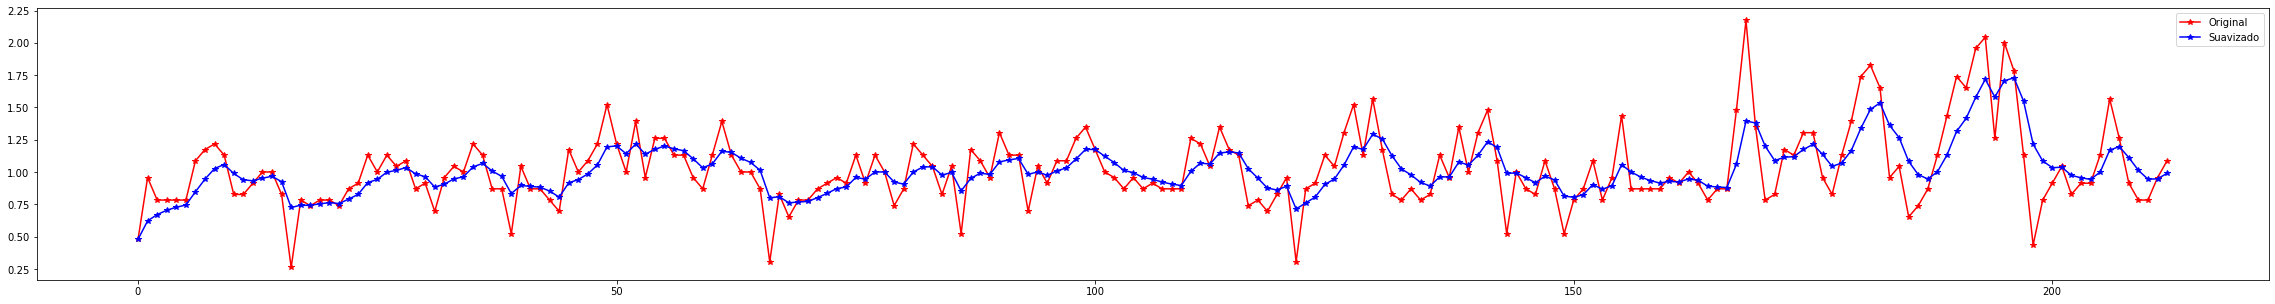

In [1298]:
dados_medios_completados_2016_suavizado = alisar_serie(dados_medios_completados_2016)

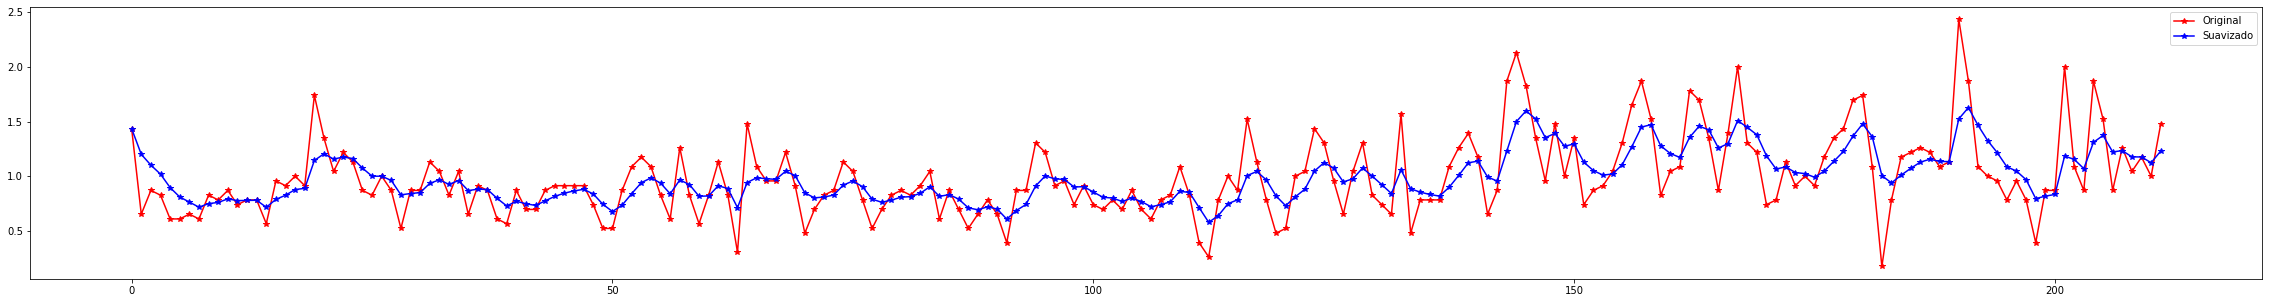

In [1299]:
dados_medios_completados_2017_suavizado = alisar_serie(dados_medios_completados_2017)

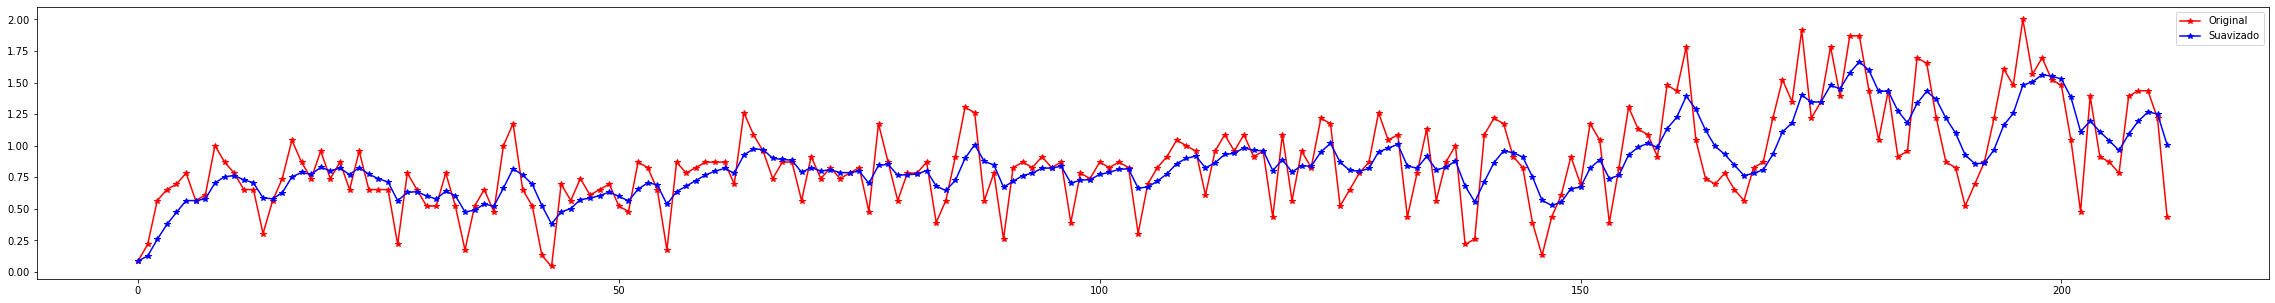

In [1300]:
dados_medios_completados_2018_suavizado = alisar_serie(dados_medios_completados_2018)

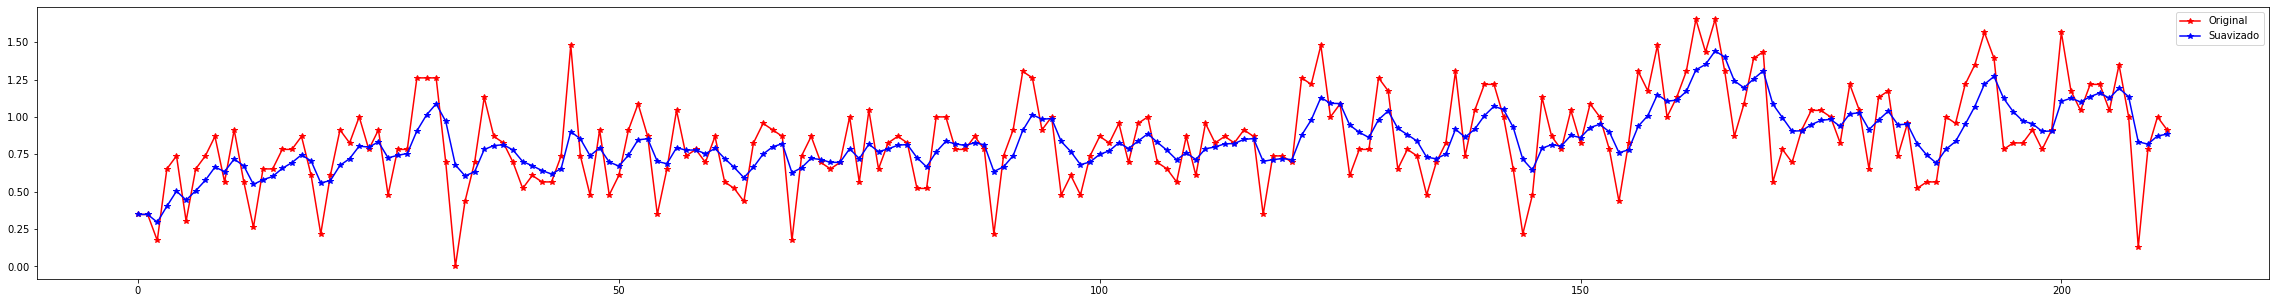

In [1301]:
dados_medios_completados_2019_suavizado = alisar_serie(dados_medios_completados_2019)

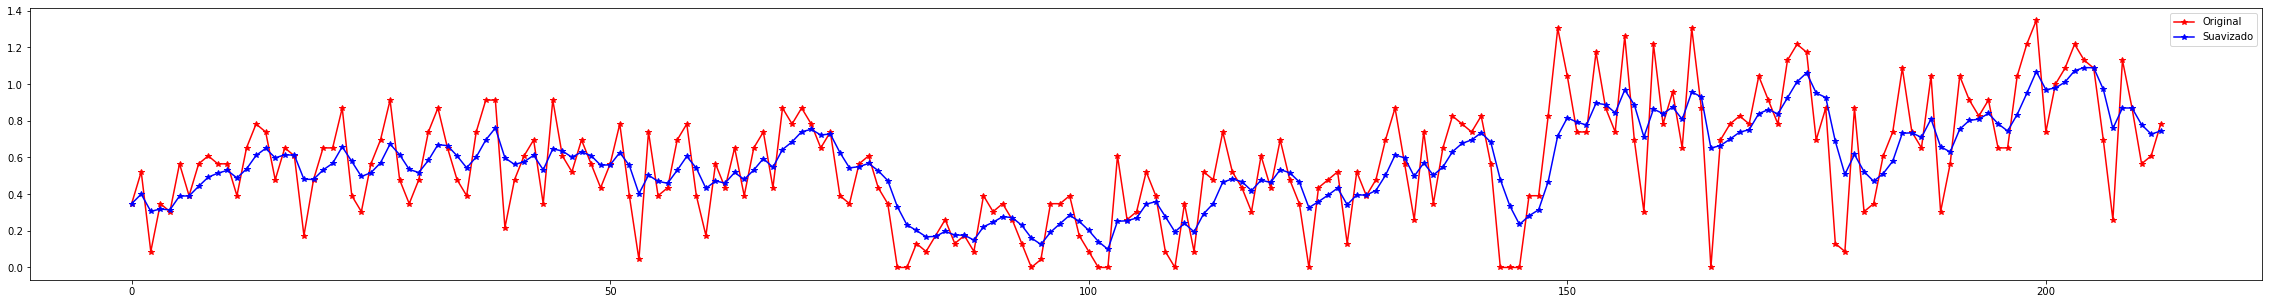

In [1302]:
dados_medios_completados_2020_suavizado = alisar_serie(dados_medios_completados_2020)

# Etapa 4: Teste estatísticos da série

$y_t - y_{t-1} = \Delta y_t = \alpha_o + \alpha_1y_{t-1}  + \epsilon_t$

A hipótese nula do Augmented Dickey-Fuller é que existe uma raiz unitária, com a alternativa de que não existe raiz unitária. Se o valor p estiver acima de um tamanho crítico, não podemos rejeitar a existência de uma raiz unitária.

Os valores p são obtidos por meio de aproximação de superfície de regressão de MacKinnon 1994, mas usando as tabelas de 2010 atualizadas. Se o valor p estiver próximo de significativo, os valores críticos devem ser usados para julgar se o nulo deve ser rejeitado.

Com isso para saber ao certo o teste, siga os passos:

1. Testar a hipótese de que $\alpha_1$=0
1. *A hipóteses alternativas $\alpha_1 < 0$ é de que o processo é estacionário
2. Se não pudermos rejeitar a hipótese, dizemos que o processo tem uma raiz unitária
3. Observe o teste t e faça a comparação com a tabela de Dickey fuller
4. Se o teste t for maior que o valor crítico da tabela no nível desejado, não podemos rejeitar a hipótese  de que o processo tem uma raiz unitária(n estacionário)
5. Se o teste t for menor que o valor crítico da tabela no nível desejado, rejeitamos a hipótese de que o processo tem uma raiz unitária(estacionário).


Referências:
+ https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
+ https://www.youtube.com/watch?v=21hH37HAkEg&ab_channel=OutspokenMarket

In [1303]:
p_v_2016 = teste_estacionariedade(dados_medios_completados_2016_suavizado)

Resultados do teste Dickey Fuller:
Teste estatístico(t stat)        -5.125864
p-value                           0.000012
#Lags Usados                      1.000000
Número de observações usadas    211.000000
Valores críticos (1%)            -3.461727
Valores críticos (5%)            -2.875337
Valores críticos (10%)           -2.574124
dtype: float64


In [1304]:
p_v_2017 = teste_estacionariedade(dados_medios_completados_2017_suavizado)

Resultados do teste Dickey Fuller:
Teste estatístico(t stat)        -1.588507
p-value                           0.489364
#Lags Usados                      9.000000
Número de observações usadas    202.000000
Valores críticos (1%)            -3.463144
Valores críticos (5%)            -2.875957
Valores críticos (10%)           -2.574455
dtype: float64


In [1305]:
p_v_2018 = teste_estacionariedade(dados_medios_completados_2018_suavizado)

Resultados do teste Dickey Fuller:
Teste estatístico(t stat)        -2.041070
p-value                           0.268860
#Lags Usados                      8.000000
Número de observações usadas    203.000000
Valores críticos (1%)            -3.462980
Valores críticos (5%)            -2.875885
Valores críticos (10%)           -2.574416
dtype: float64


In [1306]:
p_v_2019 = teste_estacionariedade(dados_medios_completados_2019_suavizado)

Resultados do teste Dickey Fuller:
Teste estatístico(t stat)        -2.597457
p-value                           0.093524
#Lags Usados                      9.000000
Número de observações usadas    202.000000
Valores críticos (1%)            -3.463144
Valores críticos (5%)            -2.875957
Valores críticos (10%)           -2.574455
dtype: float64


In [1307]:
p_v_2020 = teste_estacionariedade(dados_medios_completados_2020_suavizado)

Resultados do teste Dickey Fuller:
Teste estatístico(t stat)        -1.484376
p-value                           0.541226
#Lags Usados                      9.000000
Número de observações usadas    203.000000
Valores críticos (1%)            -3.462980
Valores críticos (5%)            -2.875885
Valores críticos (10%)           -2.574416
dtype: float64


# Etapa 5: Decompondo cada série e removendo tendência e sazonalidade

Resultados do teste Dickey Fuller:
Teste estatístico(t stat)        -5.617094
p-value                           0.000001
#Lags Usados                      2.000000
Número de observações usadas    210.000000
Valores críticos (1%)            -3.461879
Valores críticos (5%)            -2.875404
Valores críticos (10%)           -2.574159
dtype: float64


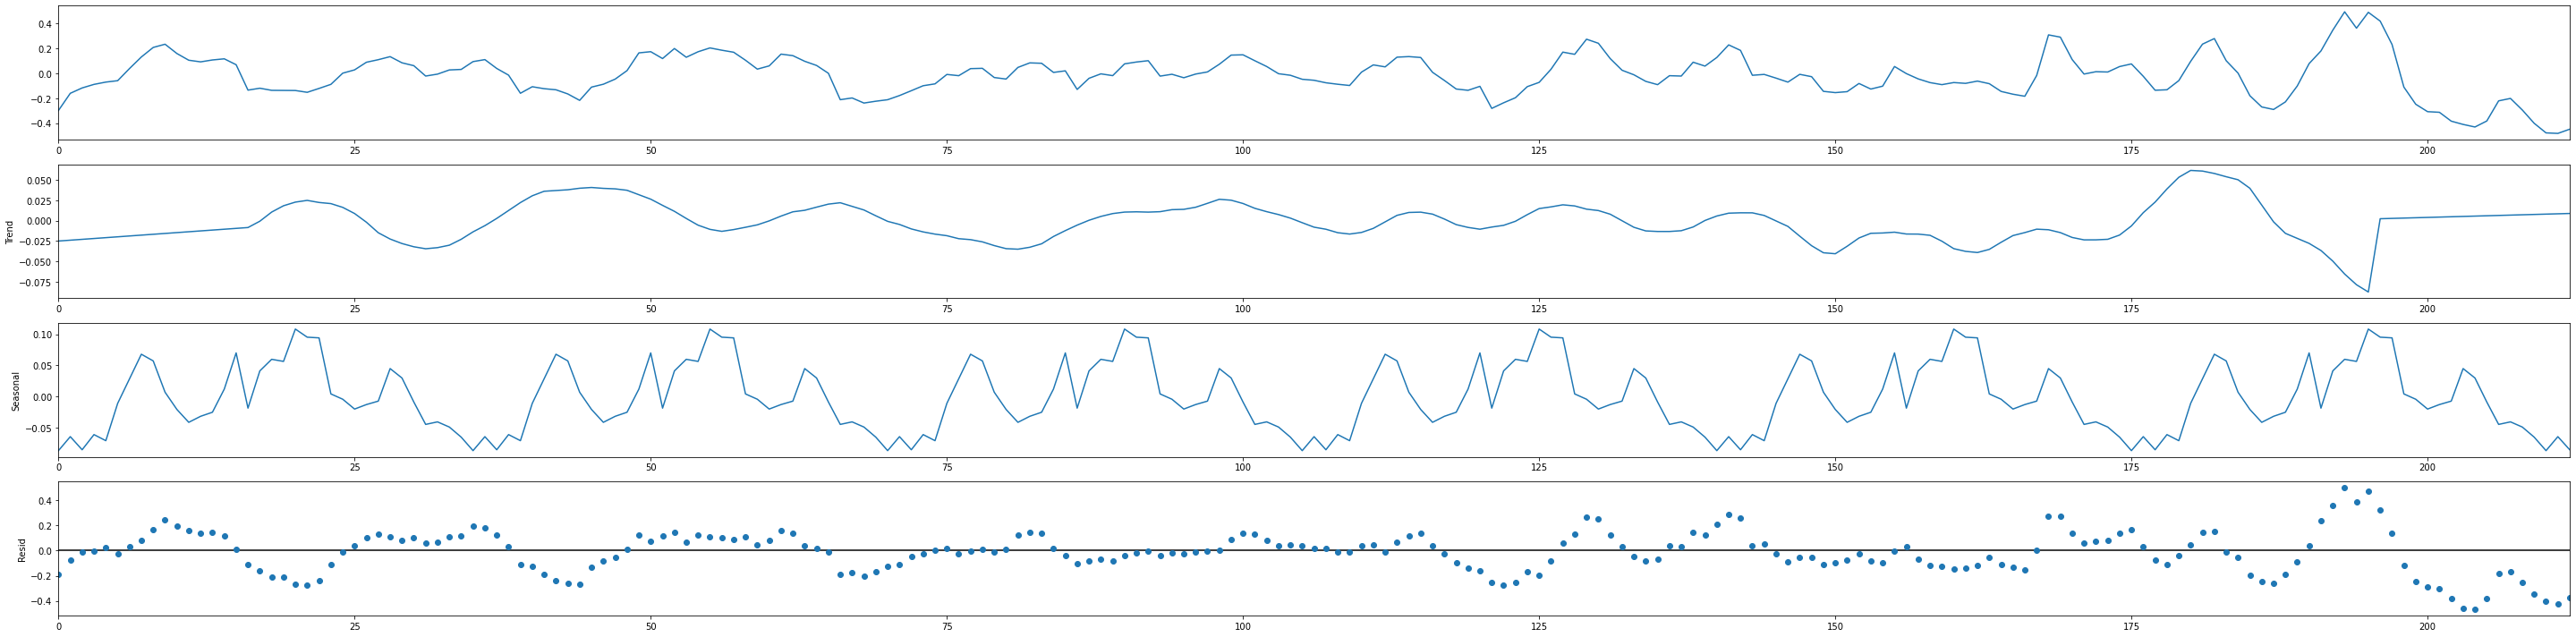

In [1356]:
serie_2016_est = remove_sazonalidade(dados_medios_completados_2016_suavizado)

Resultados do teste Dickey Fuller:
Teste estatístico(t stat)      -6.921228e+00
p-value                         1.145111e-09
#Lags Usados                    1.400000e+01
Número de observações usadas    1.970000e+02
Valores críticos (1%)          -3.463987e+00
Valores críticos (5%)          -2.876326e+00
Valores críticos (10%)         -2.574652e+00
dtype: float64


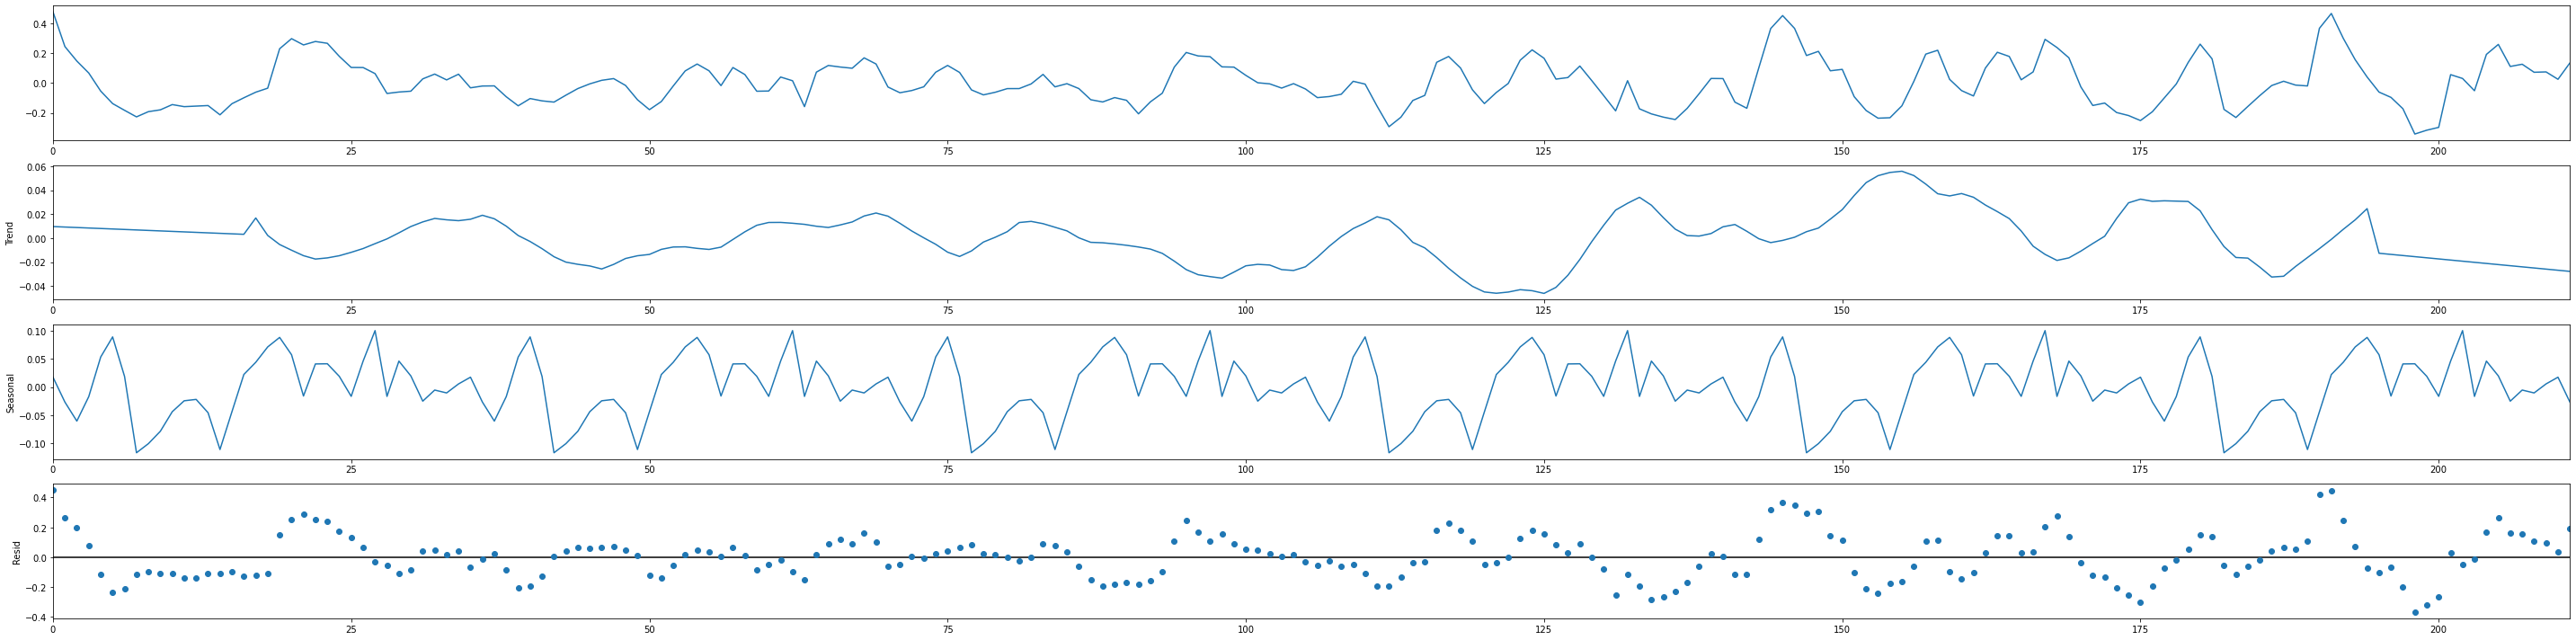

In [1357]:
serie_2017_est = remove_sazonalidade(dados_medios_completados_2017_suavizado)

Resultados do teste Dickey Fuller:
Teste estatístico(t stat)        -4.177487
p-value                           0.000719
#Lags Usados                      9.000000
Número de observações usadas    202.000000
Valores críticos (1%)            -3.463144
Valores críticos (5%)            -2.875957
Valores críticos (10%)           -2.574455
dtype: float64


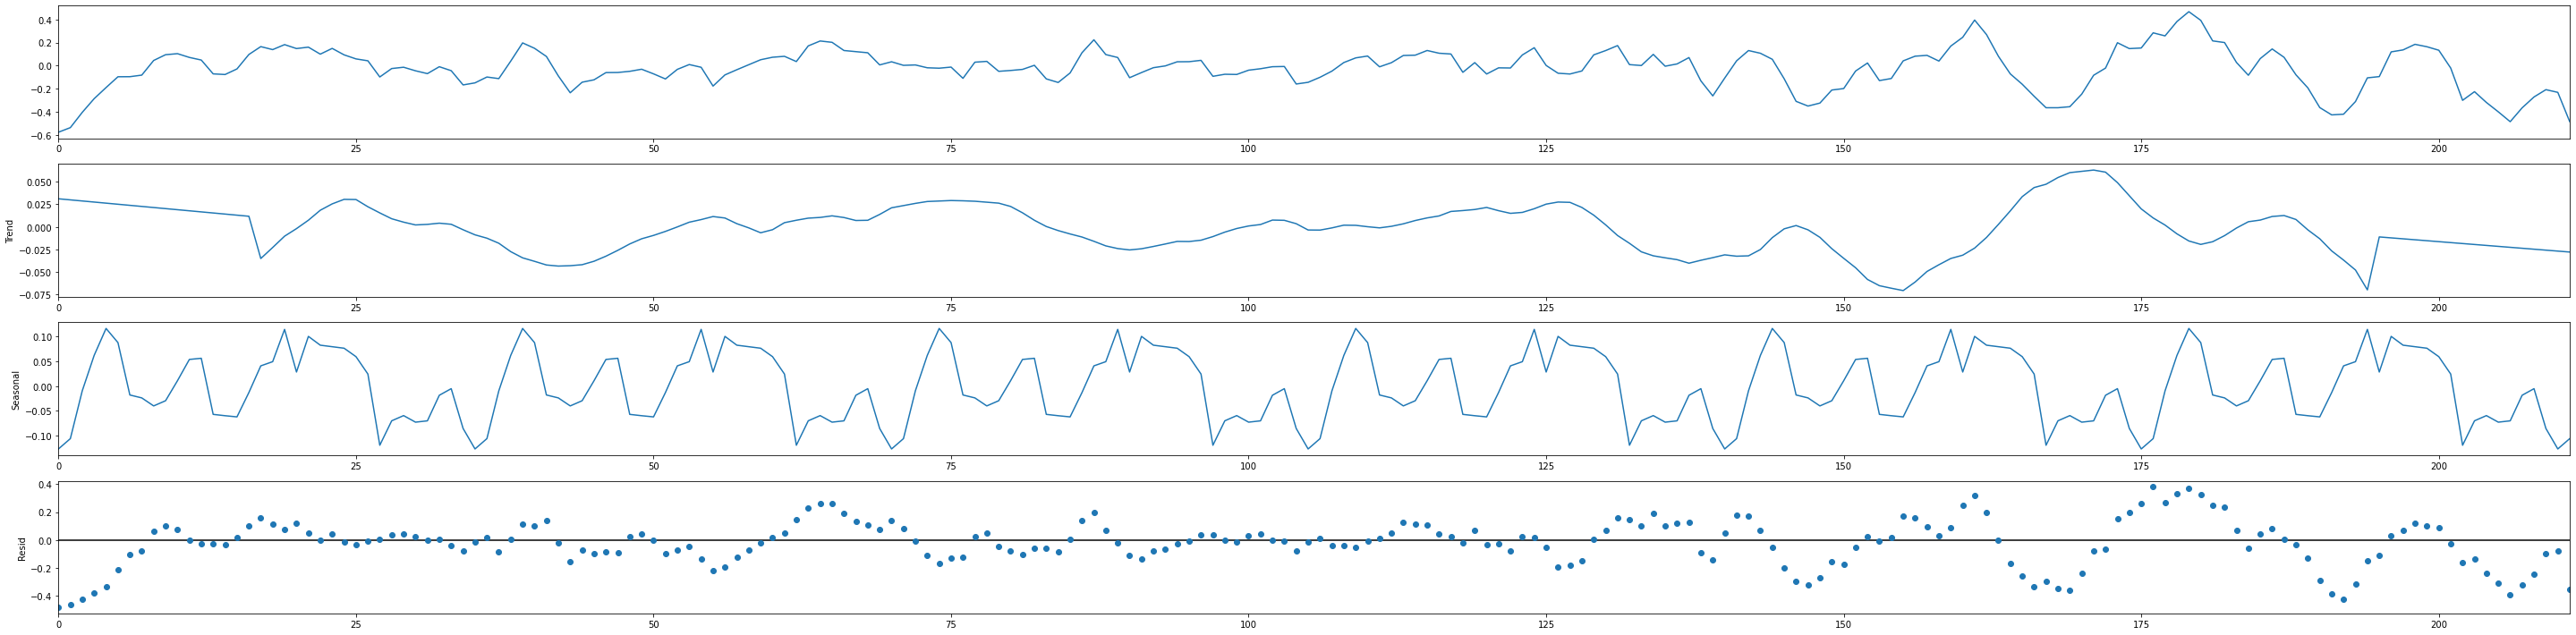

In [1358]:
serie_2018_est = remove_sazonalidade(dados_medios_completados_2018_suavizado)

Resultados do teste Dickey Fuller:
Teste estatístico(t stat)        -5.351073
p-value                           0.000004
#Lags Usados                     14.000000
Número de observações usadas    197.000000
Valores críticos (1%)            -3.463987
Valores críticos (5%)            -2.876326
Valores críticos (10%)           -2.574652
dtype: float64


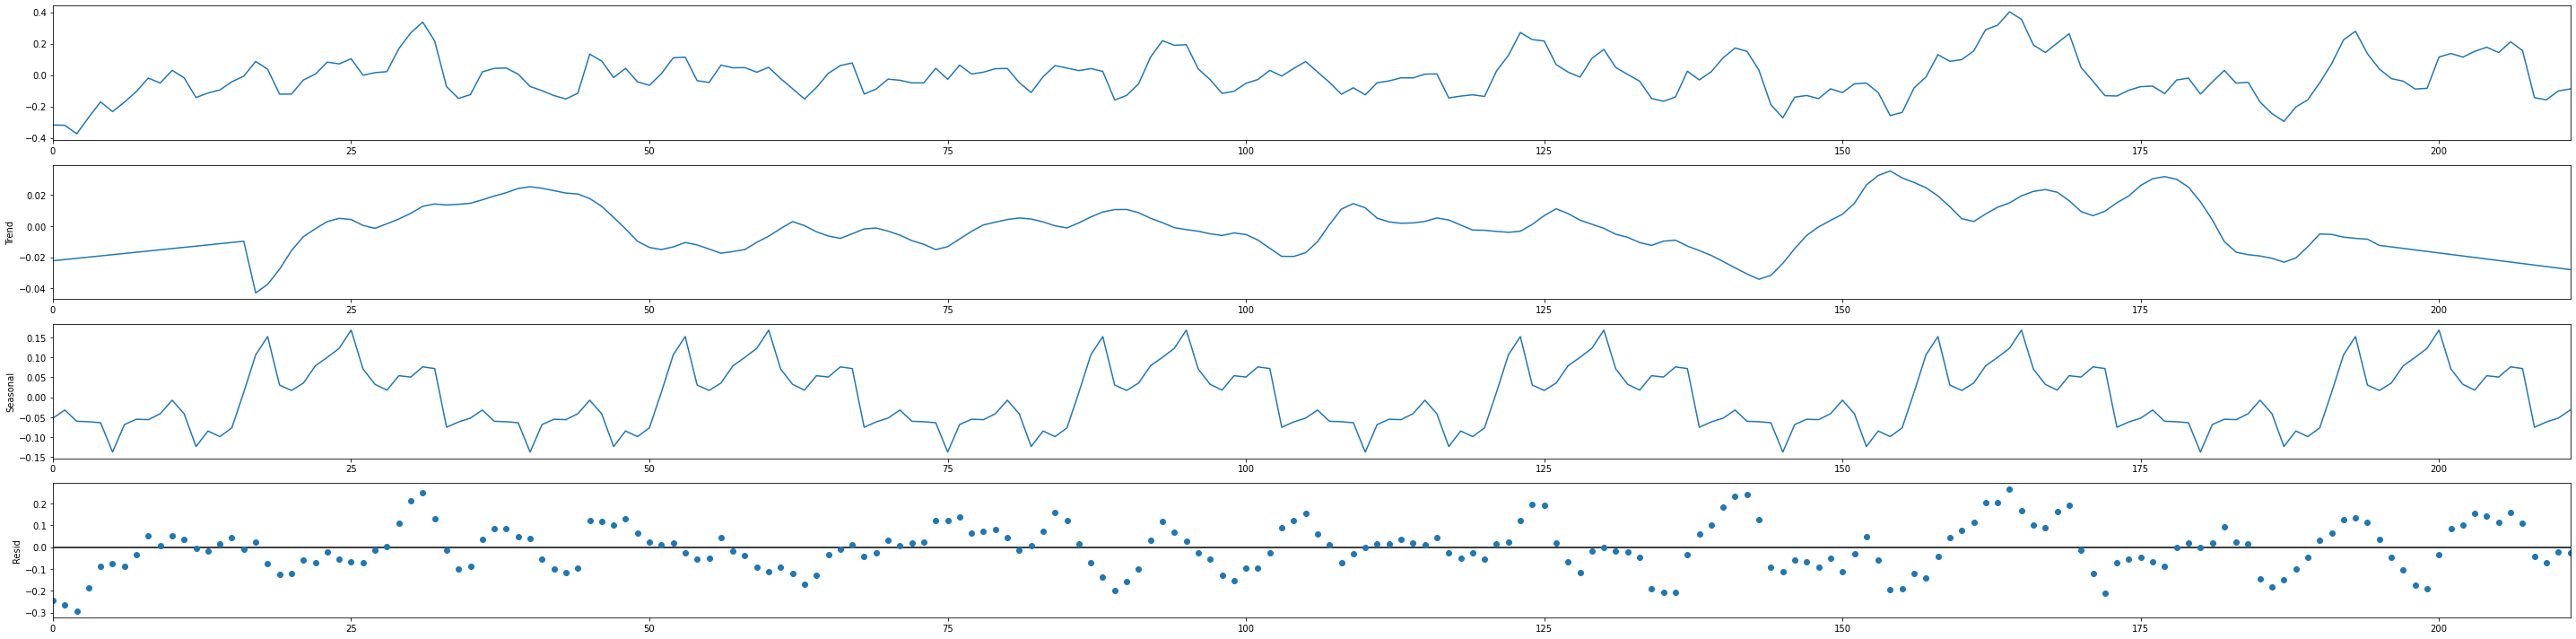

In [1359]:
serie_2019_est = remove_sazonalidade(dados_medios_completados_2019_suavizado)

Resultados do teste Dickey Fuller:
Teste estatístico(t stat)        -4.886095
p-value                           0.000037
#Lags Usados                     14.000000
Número de observações usadas    198.000000
Valores críticos (1%)            -3.463815
Valores críticos (5%)            -2.876251
Valores críticos (10%)           -2.574611
dtype: float64


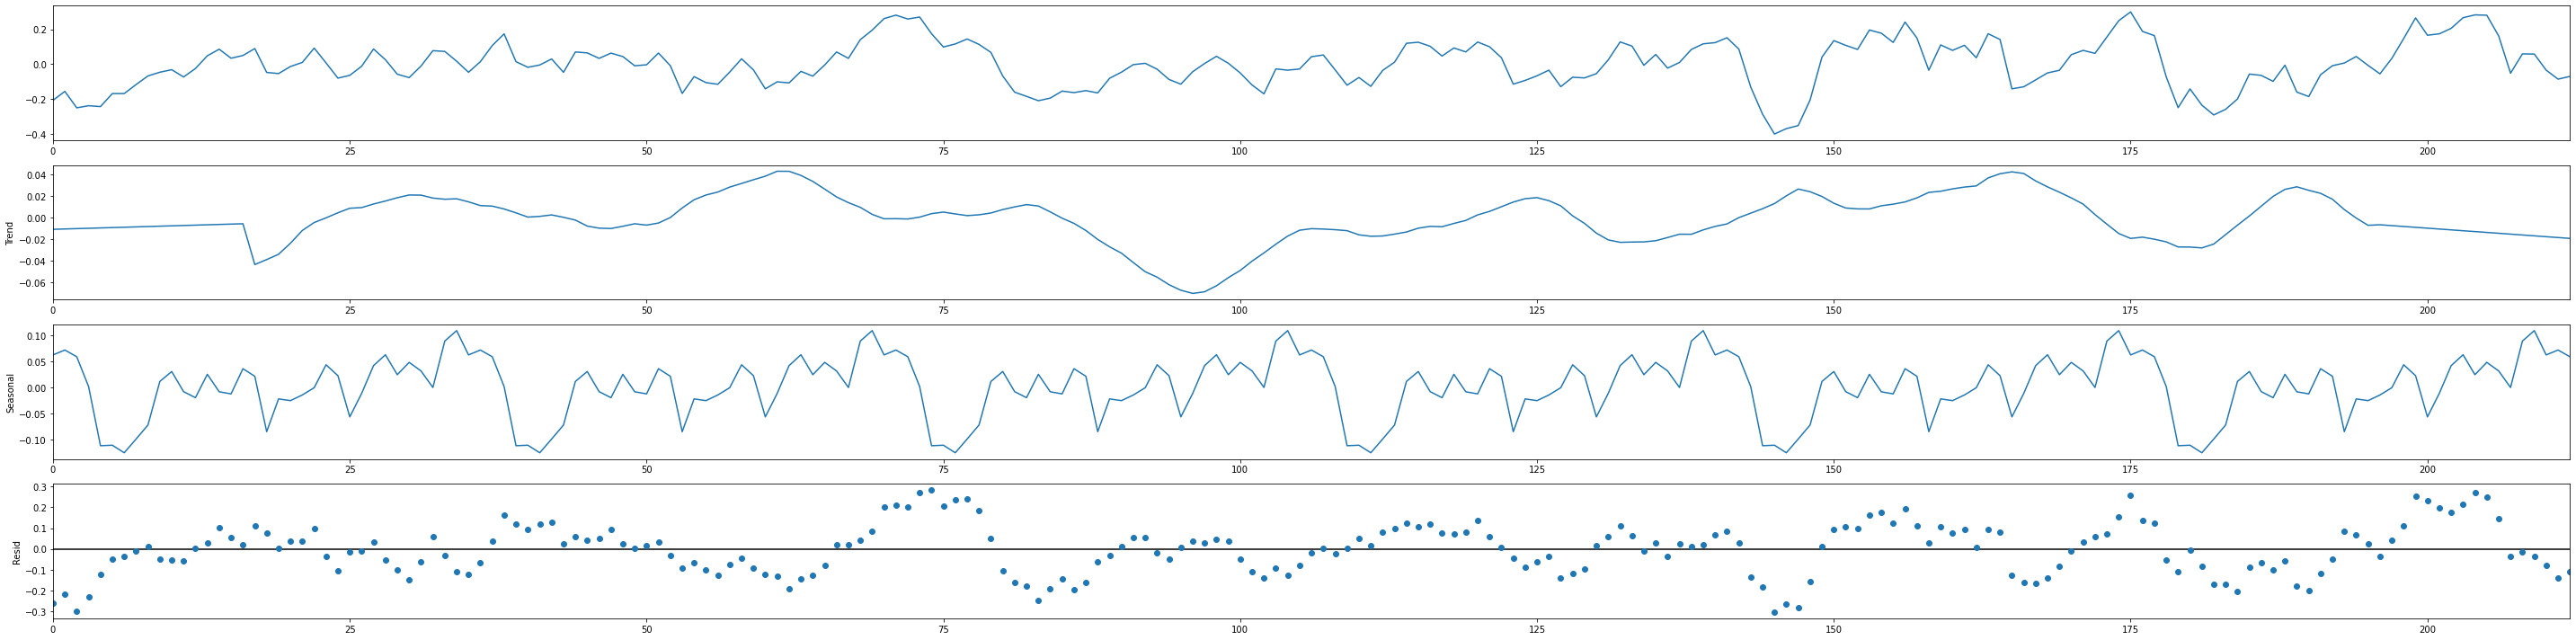

In [1360]:
serie_2020_est = remove_sazonalidade(dados_medios_completados_2020_suavizado)

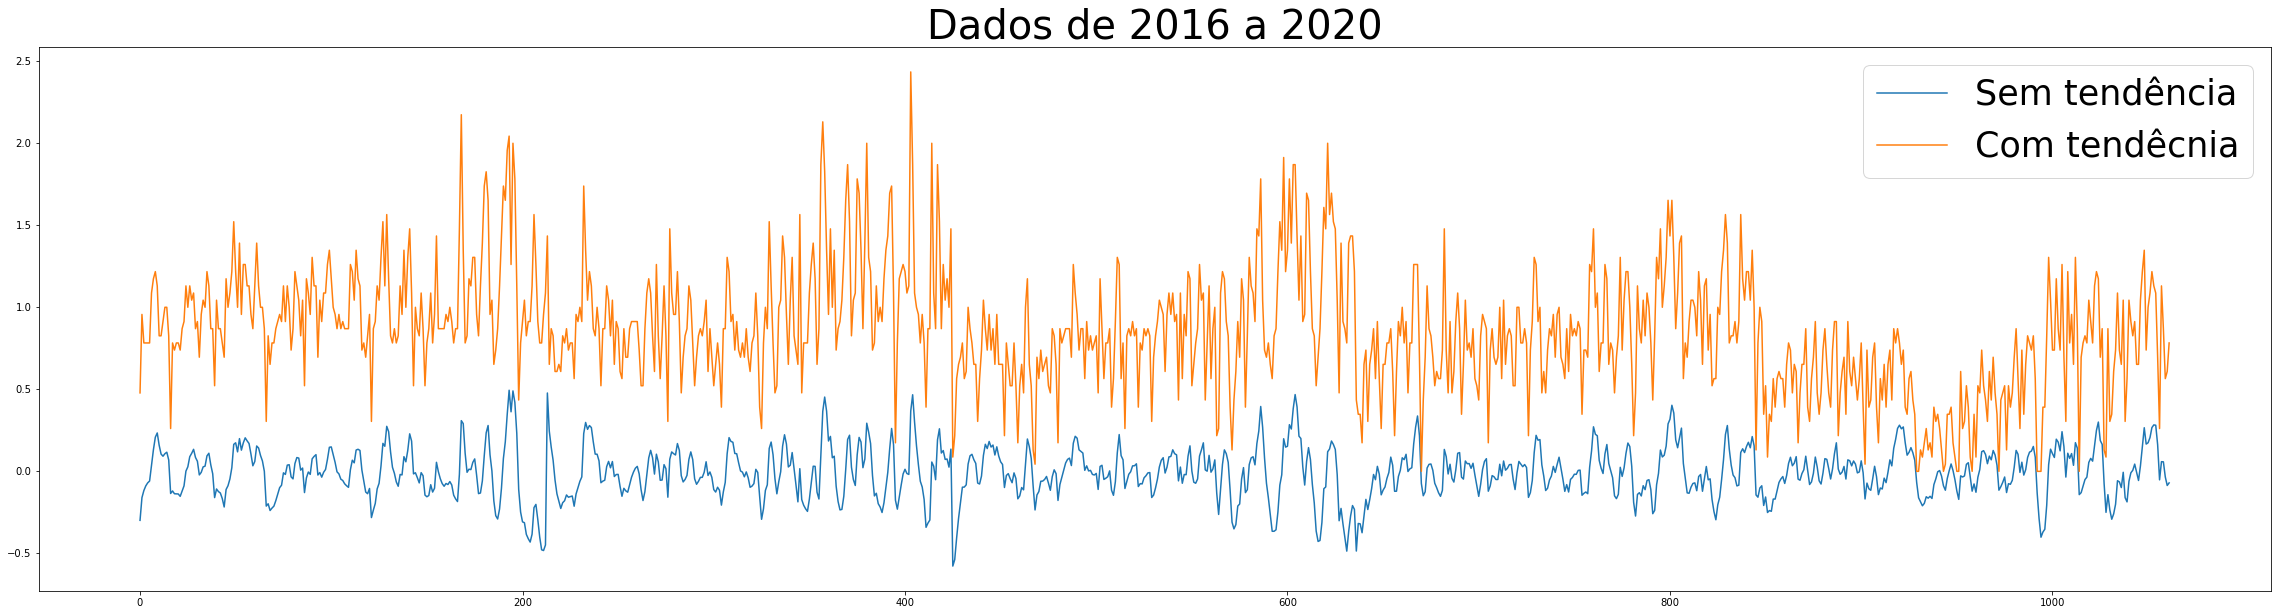

In [1373]:
a = pd.concat([serie_2016_est,serie_2017_est,serie_2018_est,serie_2019_est,serie_2020_est])
b = pd.concat([dados_medios_completados_2016,
               dados_medios_completados_2017,
               dados_medios_completados_2018,
               dados_medios_completados_2019,
               dados_medios_completados_2020])
plt.title('Dados de 2016 a 2020',fontsize=40)
plt.plot(a.values,'-',label='Sem tendência')
plt.plot(b.values,'-',label='Com tendêcnia')
plt.legend(loc='best',fontsize=35)

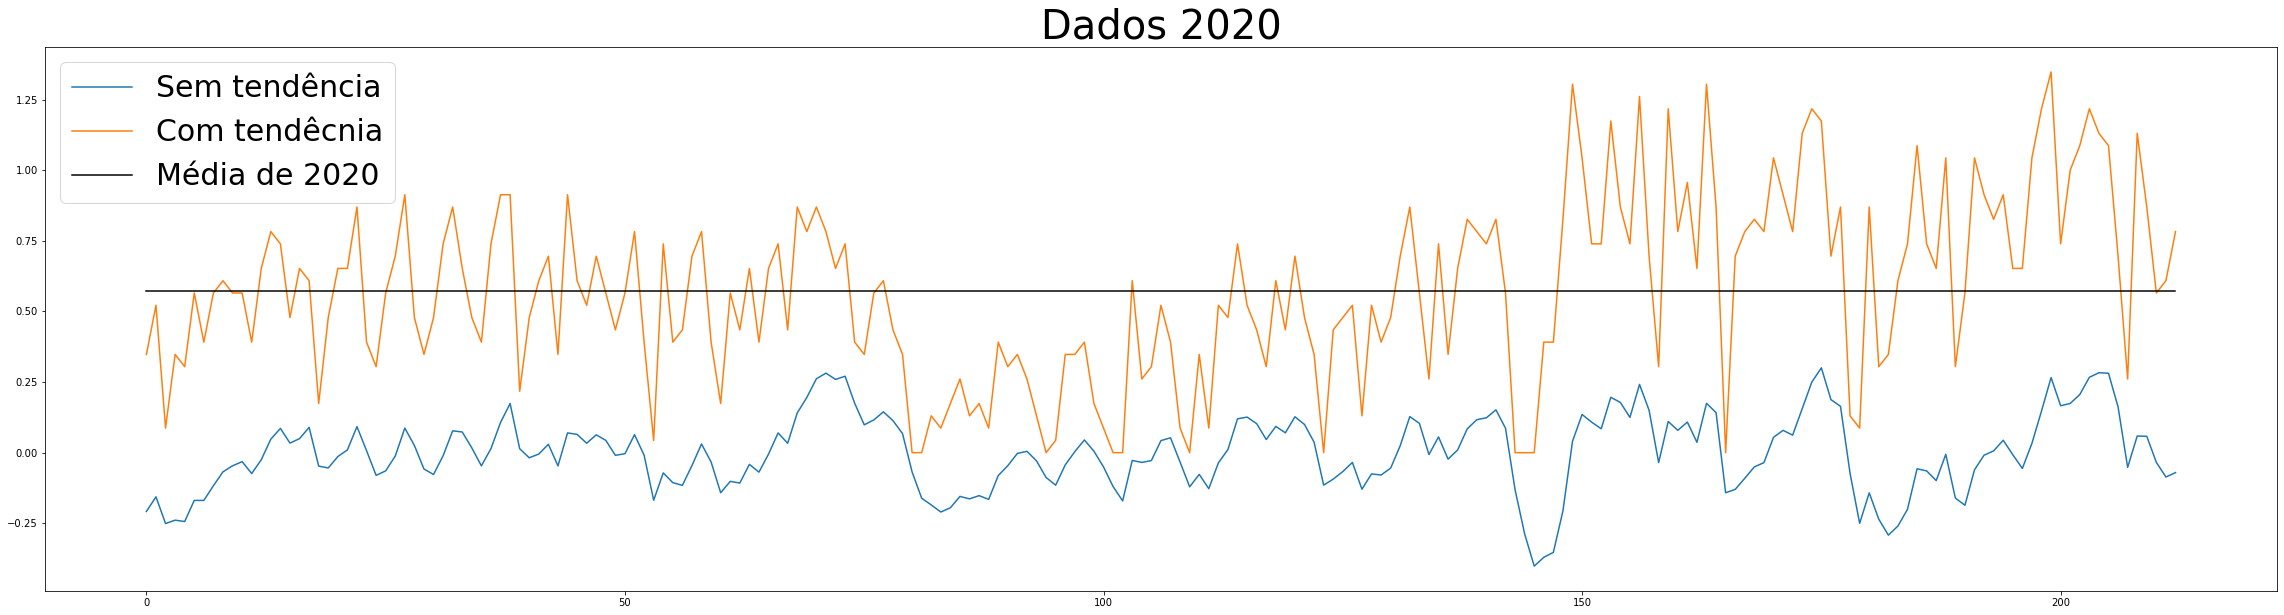

In [1379]:
plt.title('Dados 2020',fontsize=40)
plt.plot(serie_2020_est.values,'-',label='Sem tendência')
plt.plot(dados_medios_completados_2020.values,'-',label='Com tendêcnia')
plt.plot([i for i in range(dados_medios_completados_2020.shape[0])],[dados_medios_completados_2020.mean().mean() for i in range(dados_medios_completados_2020.shape[0])]
         ,'k-',label='Média de 2020')
plt.legend(loc='best',fontsize=30)
plt.show()

# Etapa 6: Autocorrelação das séries

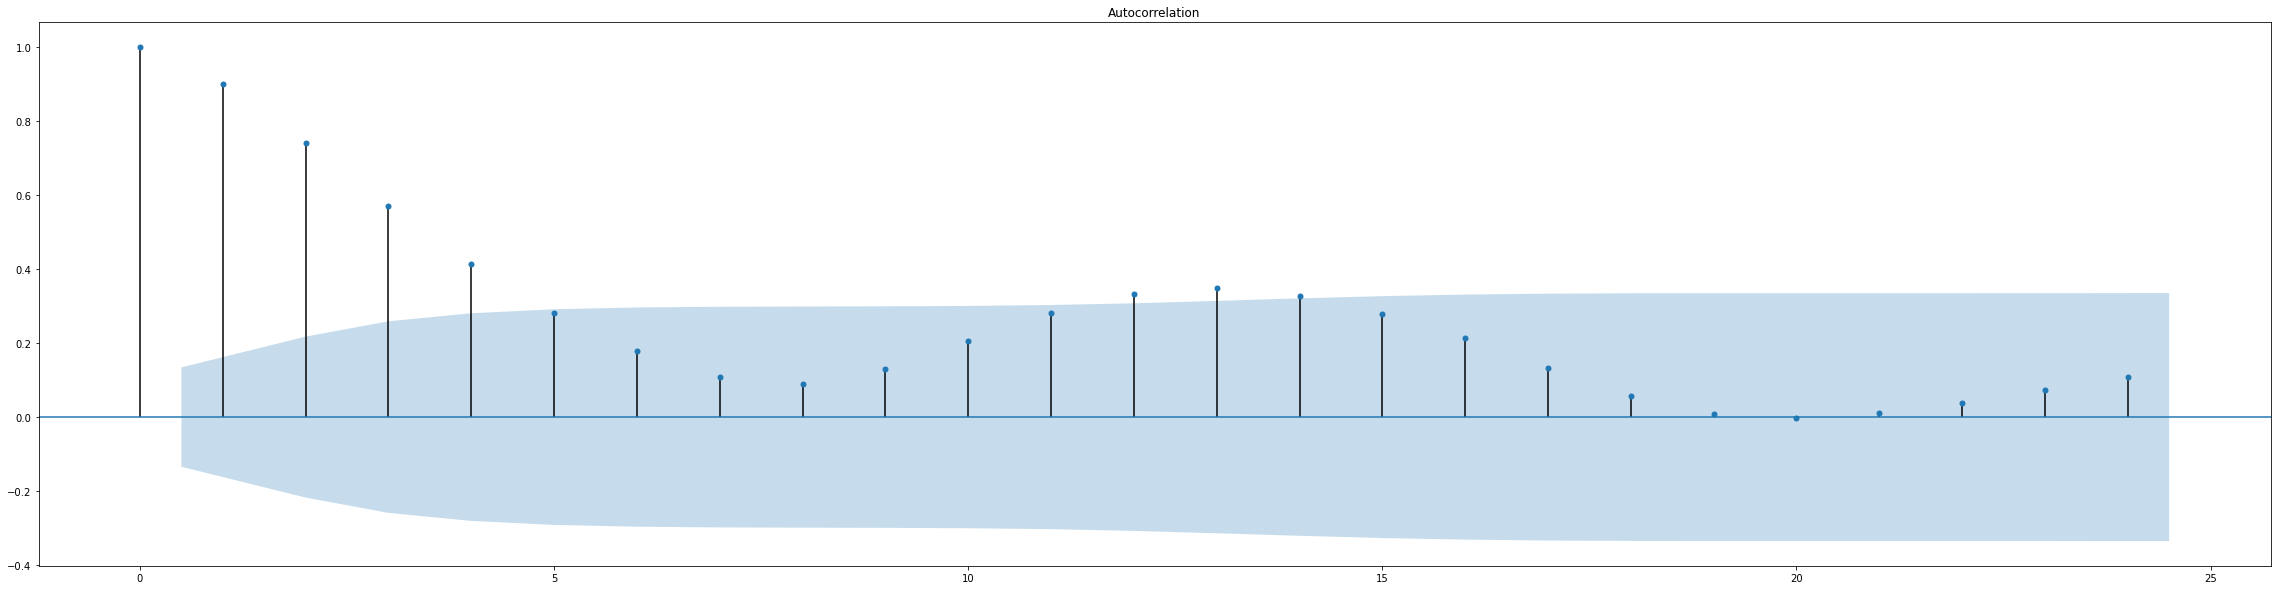

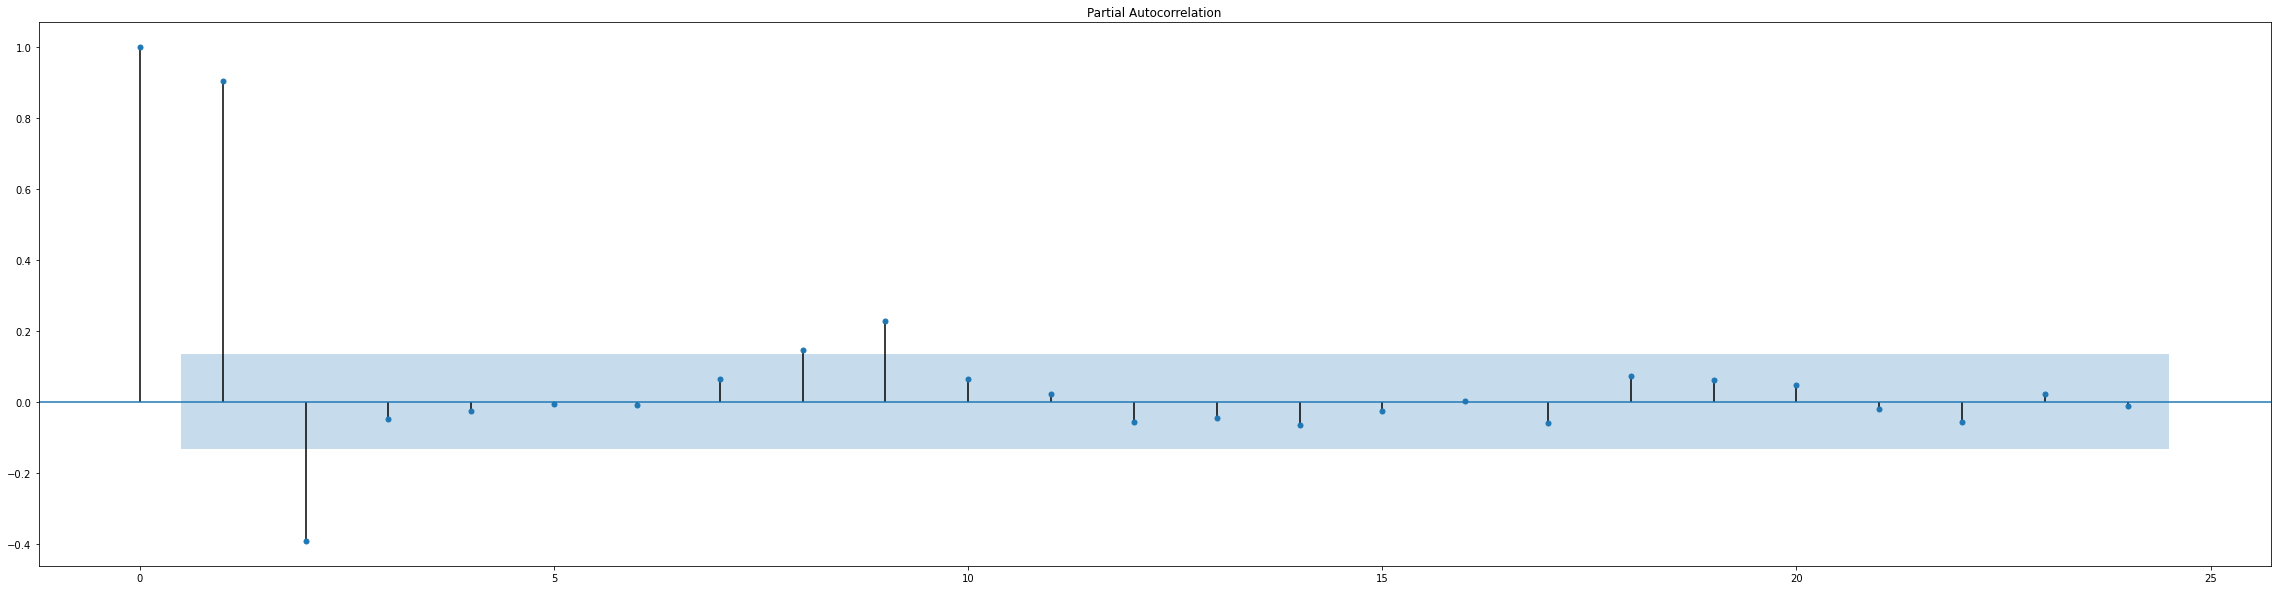

In [1313]:
plot_acf(serie_2016_est);
plot_pacf(serie_2016_est);

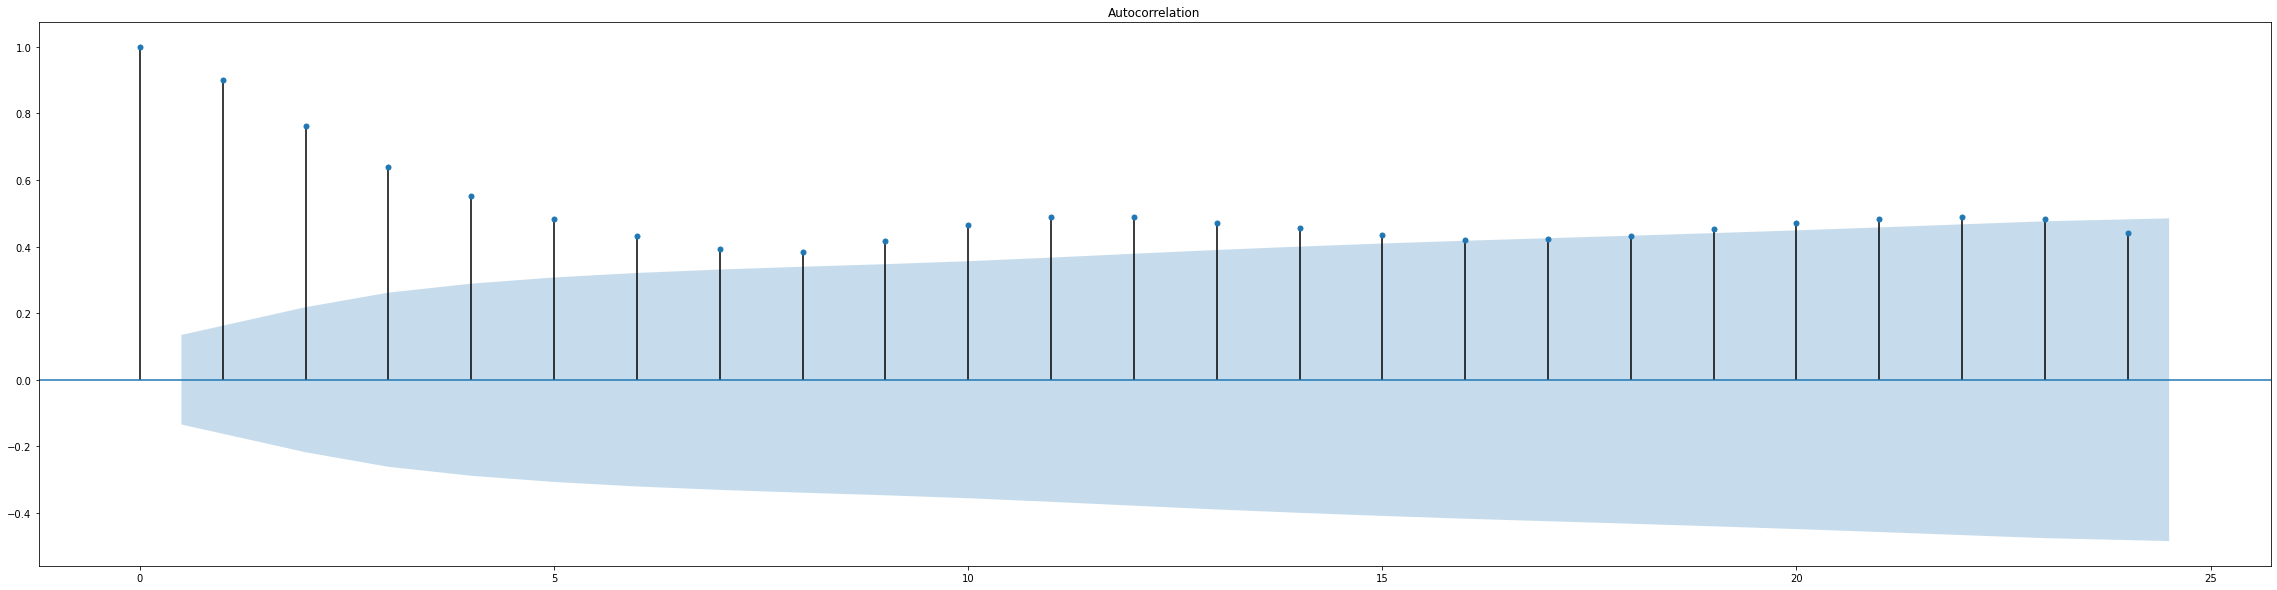

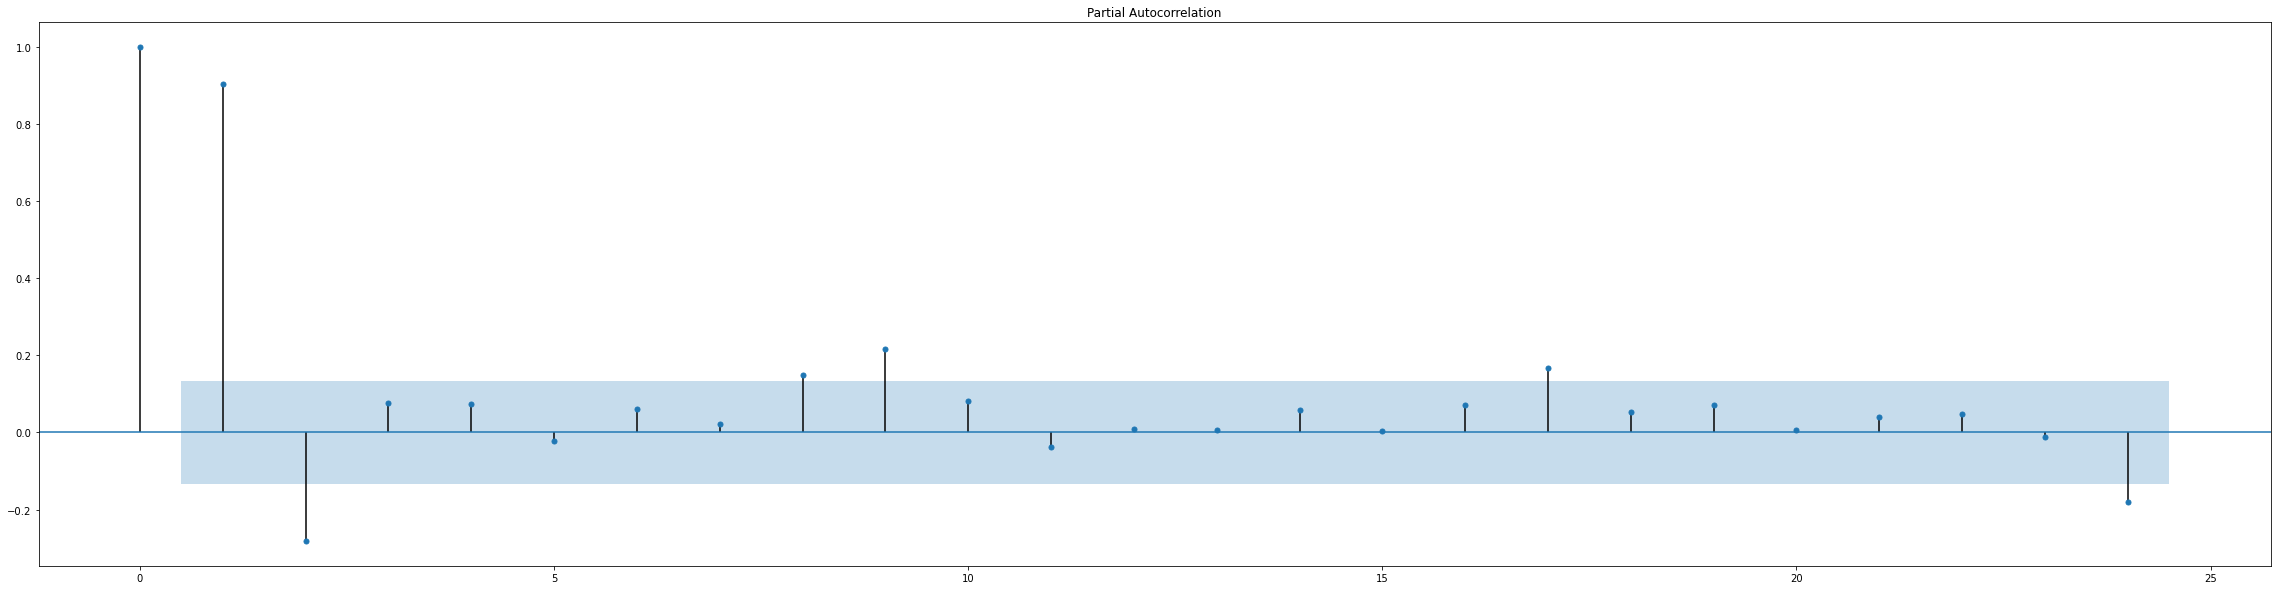

In [1314]:
plot_acf(serie_2017_est);
plot_pacf(serie_2017_est);

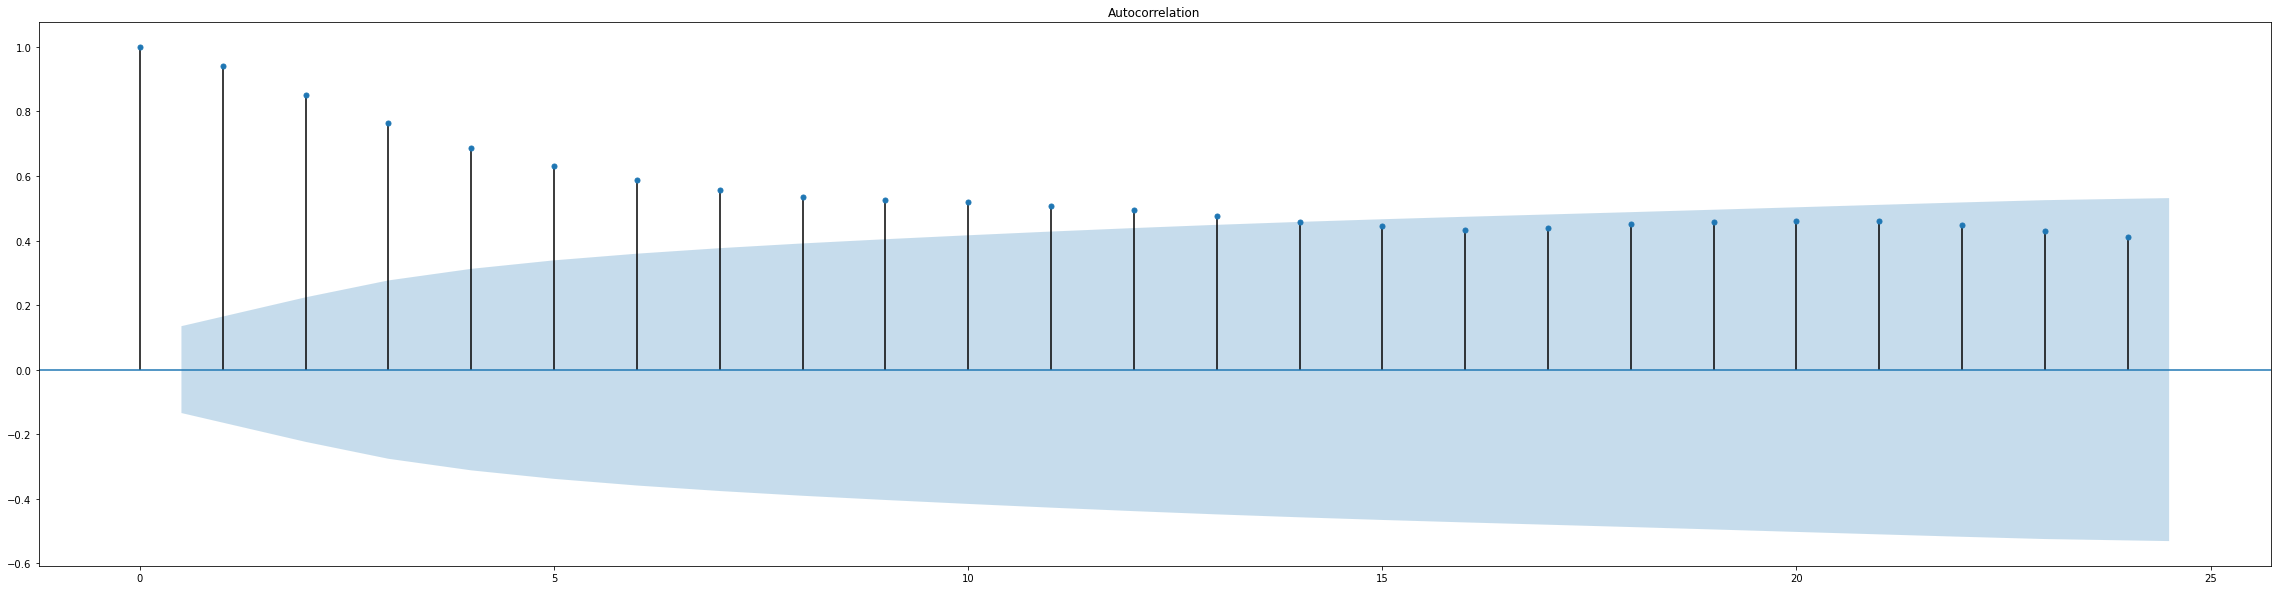

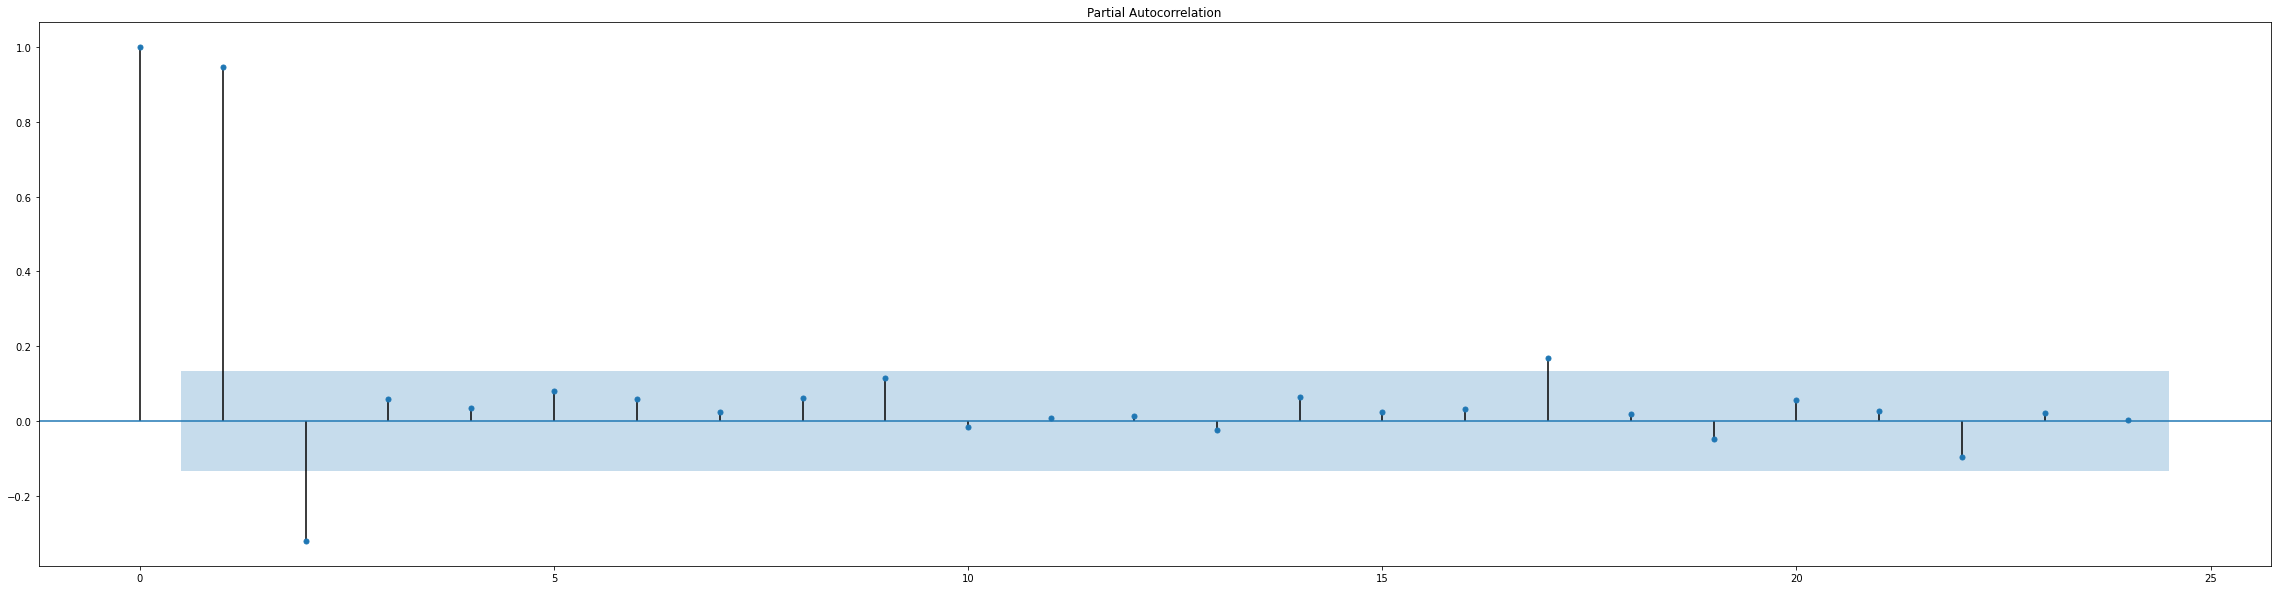

In [1315]:
plot_acf(serie_2018_est);
plot_pacf(serie_2018_est);

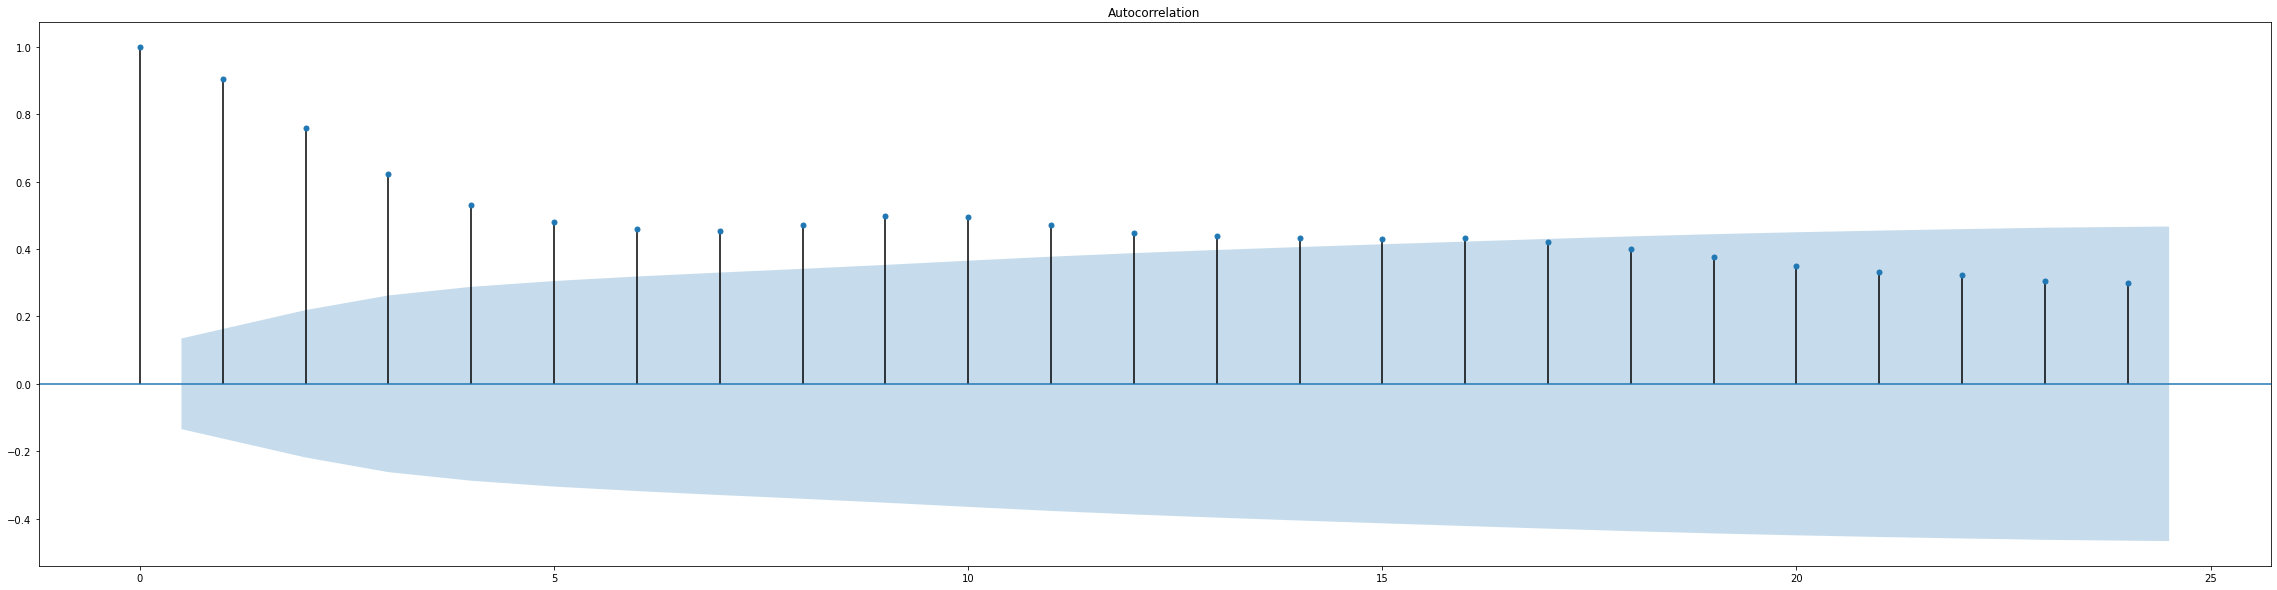

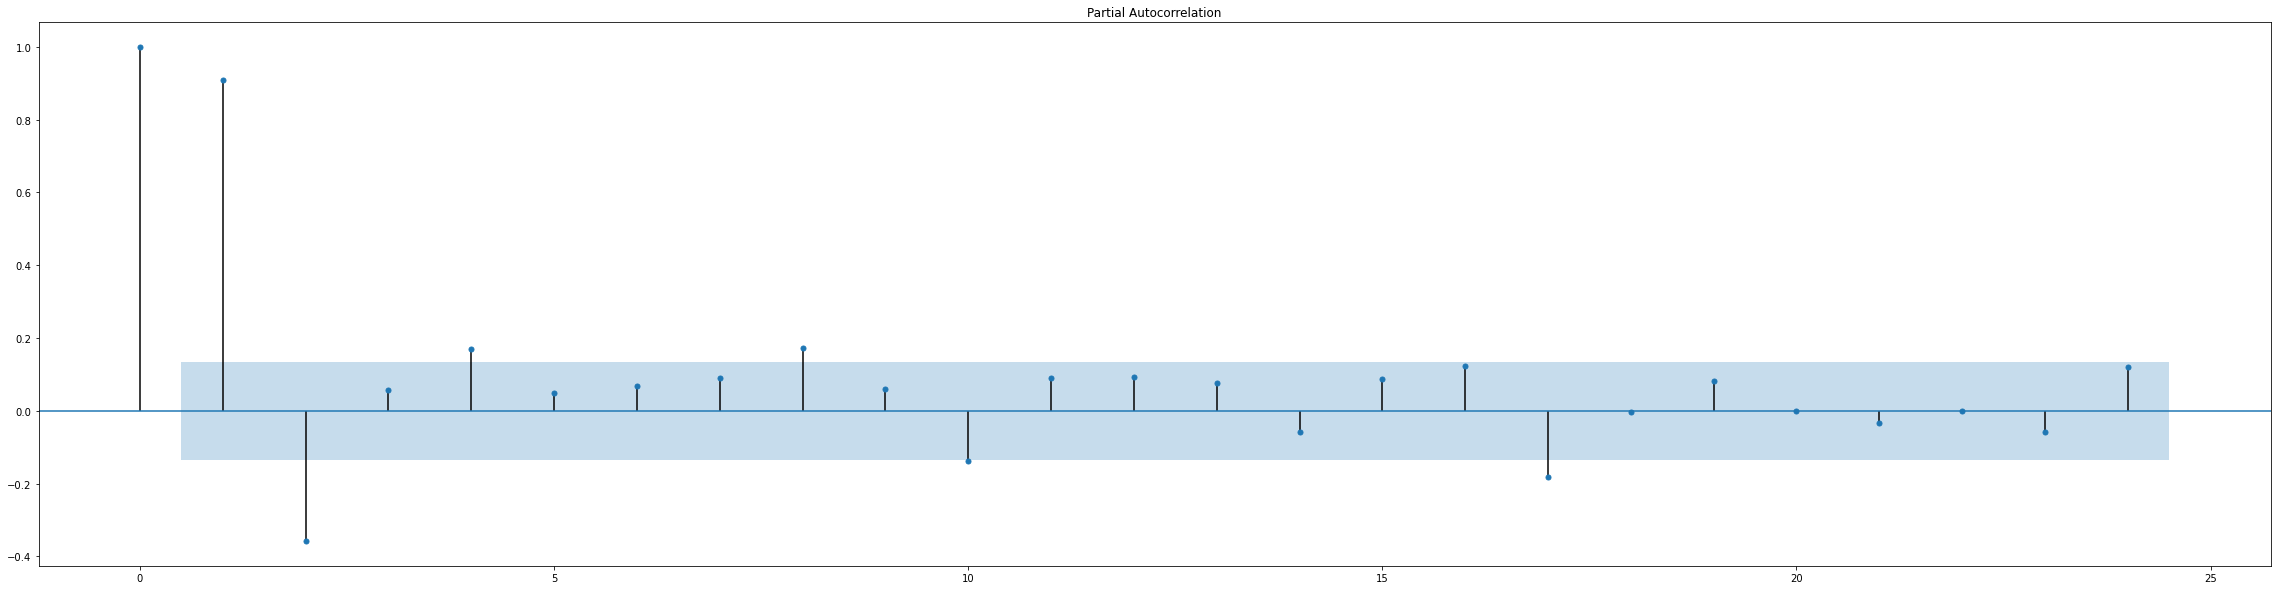

In [1316]:
plot_acf(serie_2019_est);
plot_pacf(serie_2019_est);

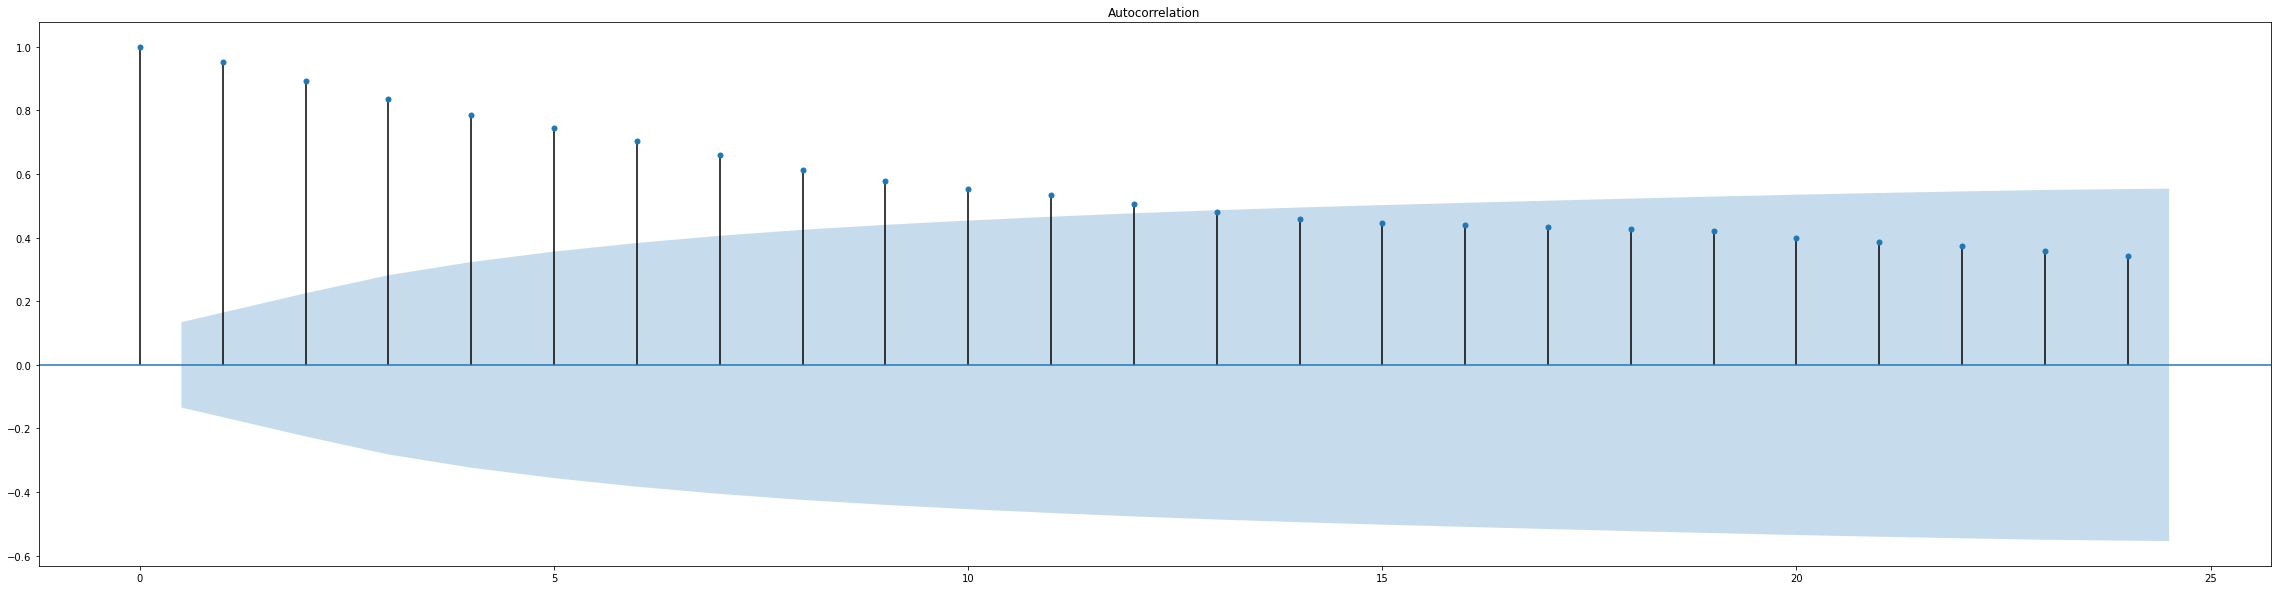

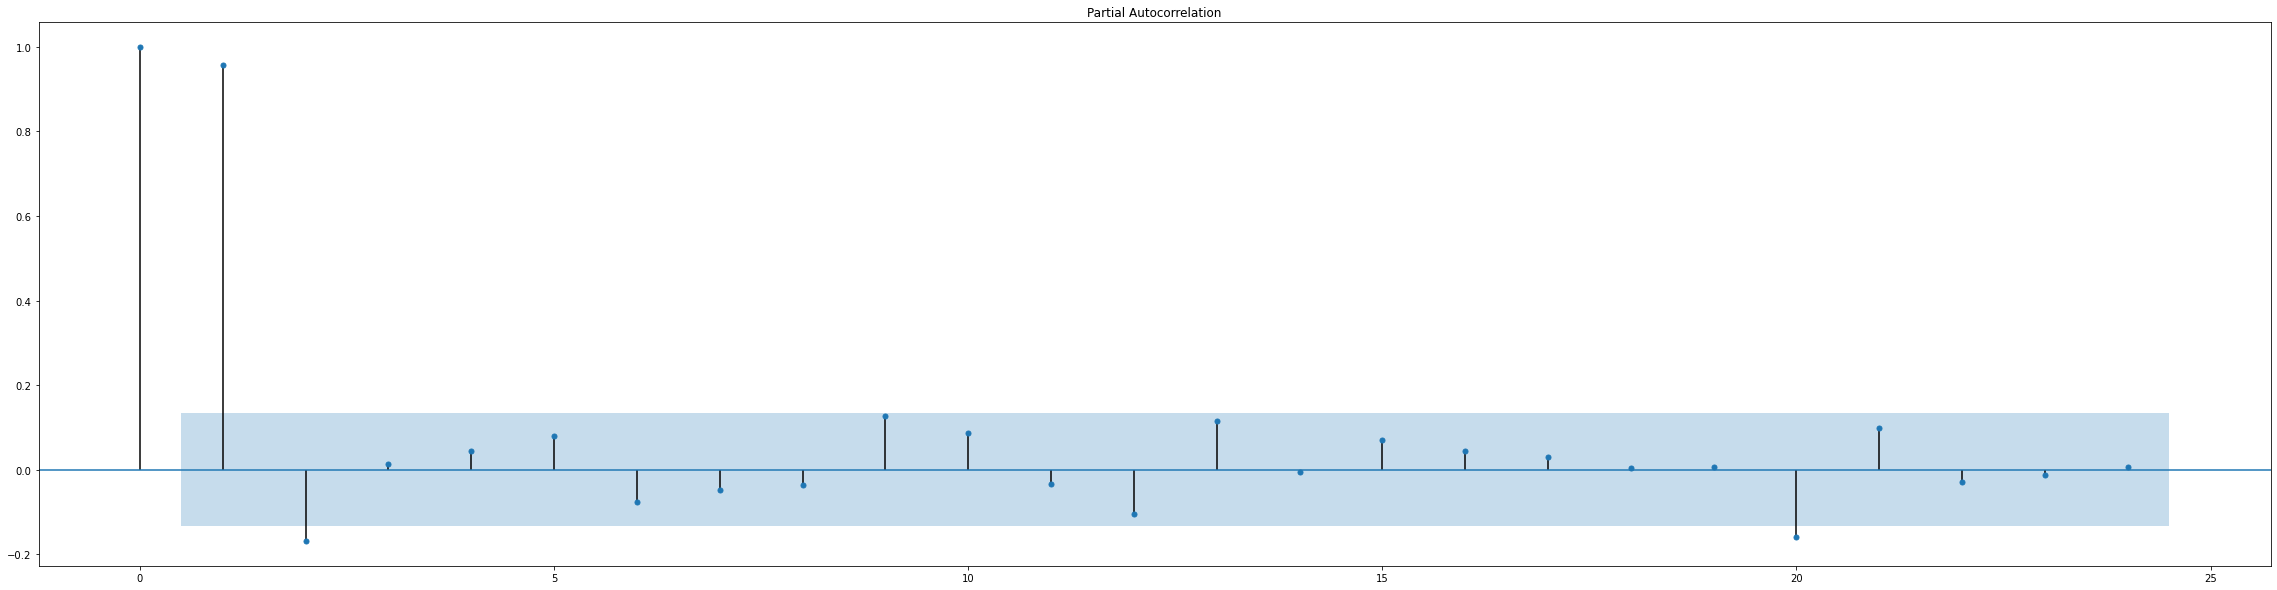

In [1317]:
plot_acf(serie_2020_est);
plot_pacf(serie_2020_est);

# Verificando variação nos dados - velocidade de mudança

In [1318]:
eixo_2016 = ano_bisexto(2016)
eixo_2017 = ano_normal(2017)
eixo_2018 = ano_normal(2018)
eixo_2019 = ano_normal(2019)
eixo_2020 = ano_bisexto(2020)

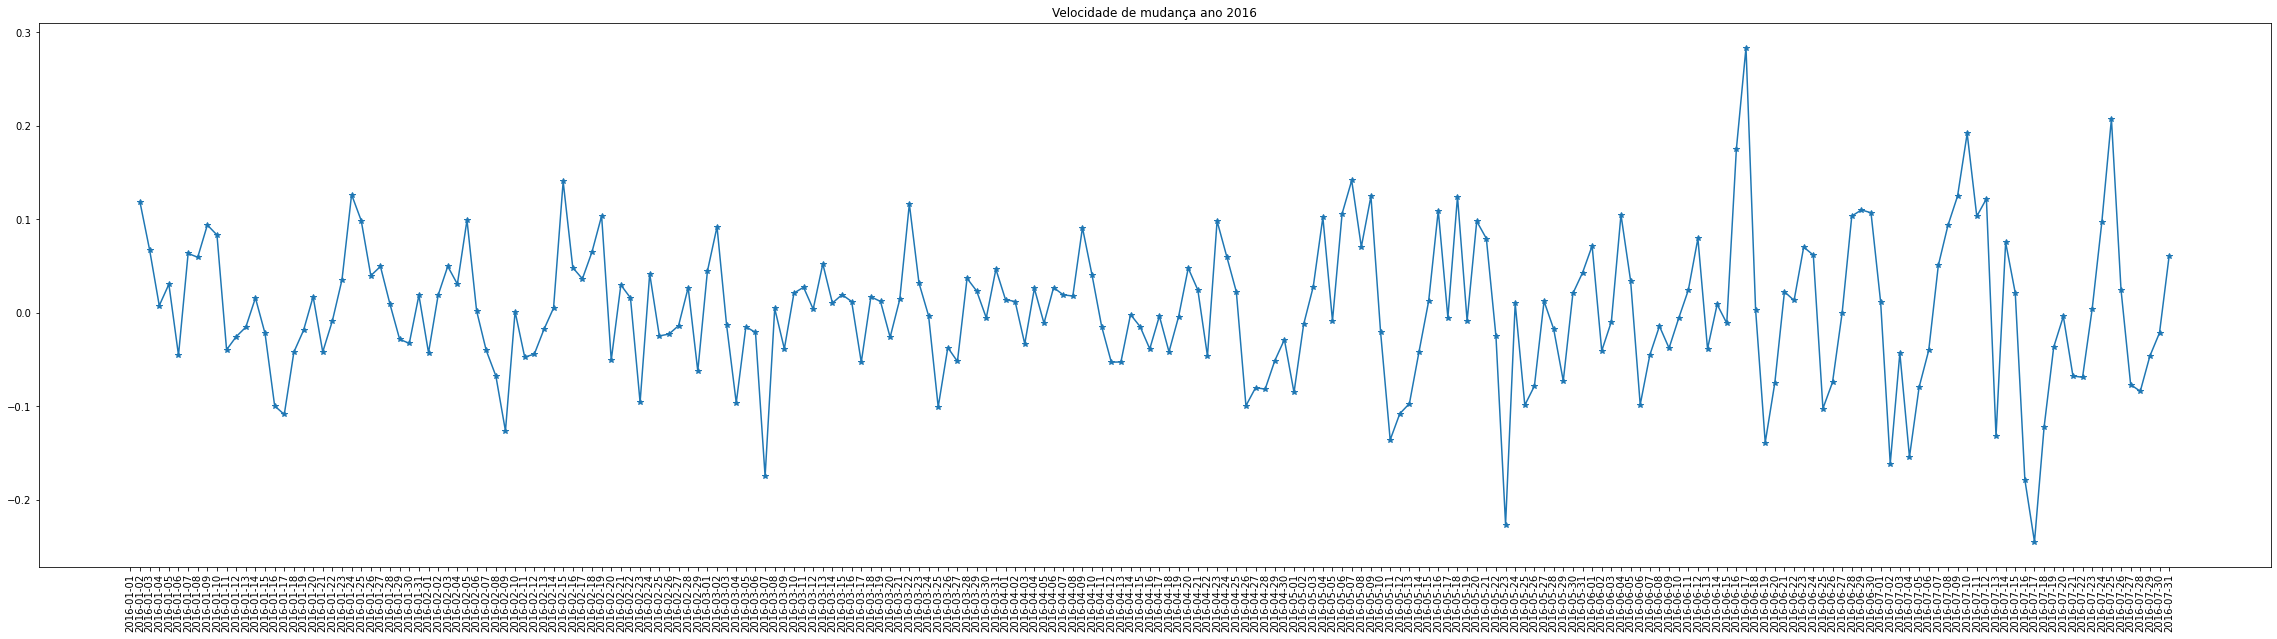

In [1319]:
plt.figure(figsize=(40,10))
plt.title('Velocidade de mudança ano 2016')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2016.values],rotation=90)
plt.plot(serie_2016_est.diff(),'*-')
plt.show()

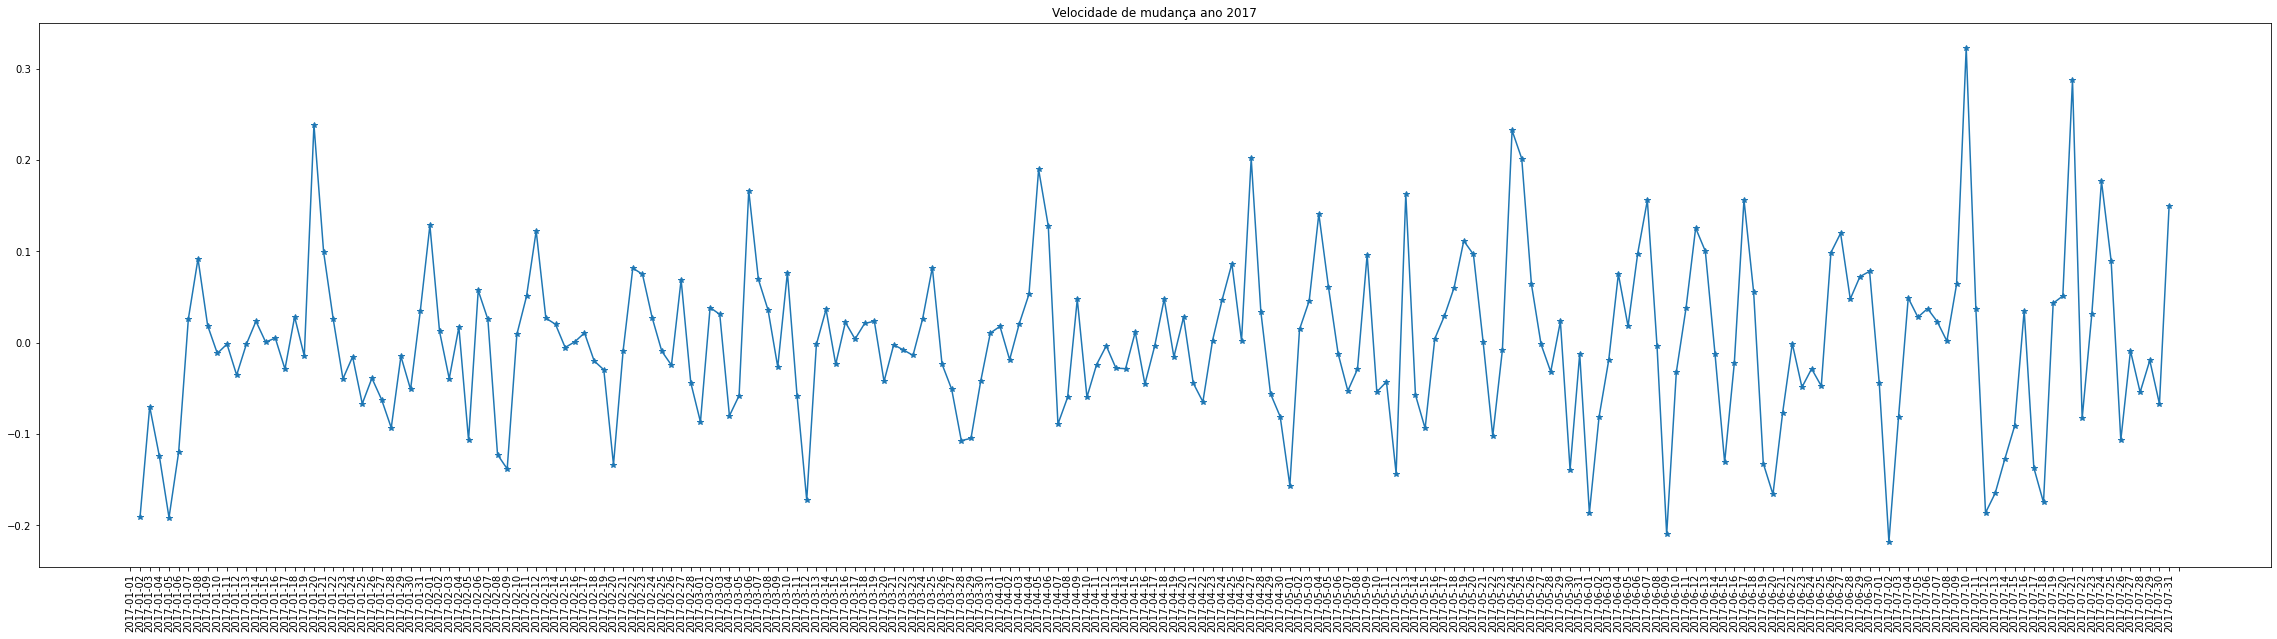

In [1320]:
plt.figure(figsize=(40,10))
plt.title('Velocidade de mudança ano 2017')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2017.values],rotation=90)
plt.plot(serie_2017_est.diff(),'*-');
plt.show()

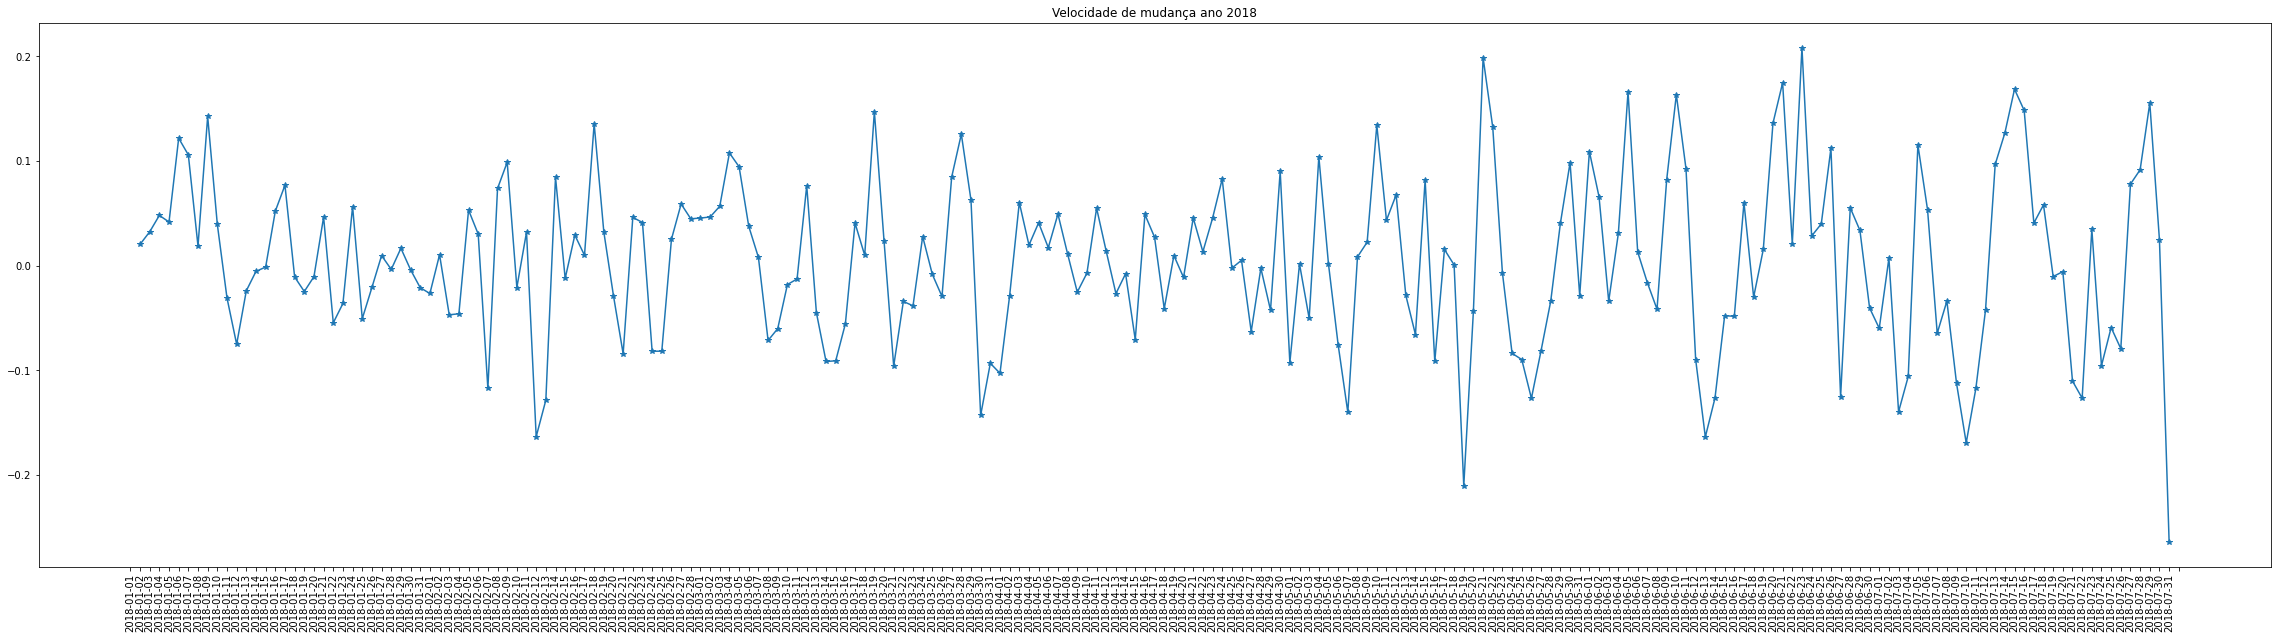

In [1321]:
plt.figure(figsize=(40,10))
plt.title('Velocidade de mudança ano 2018')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2018.values],rotation=90)
plt.plot(serie_2018_est.diff(),'*-');
plt.show()

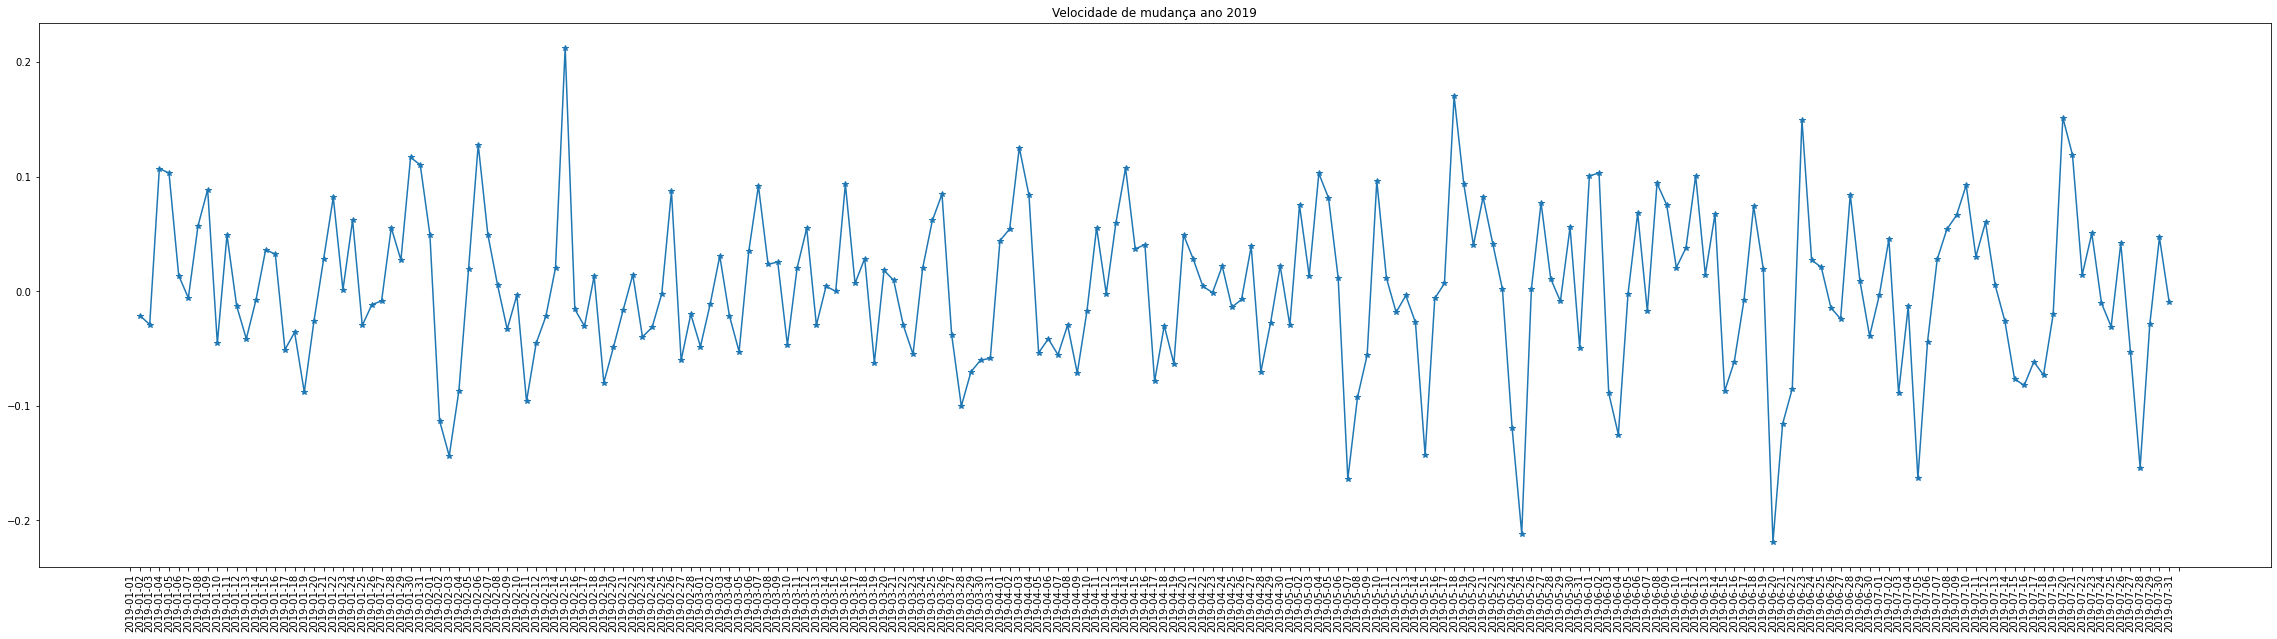

In [1322]:
plt.figure(figsize=(40,10))
plt.title('Velocidade de mudança ano 2019')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2019.values],rotation=90)
plt.plot(serie_2019_est.diff(),'*-');
plt.show()

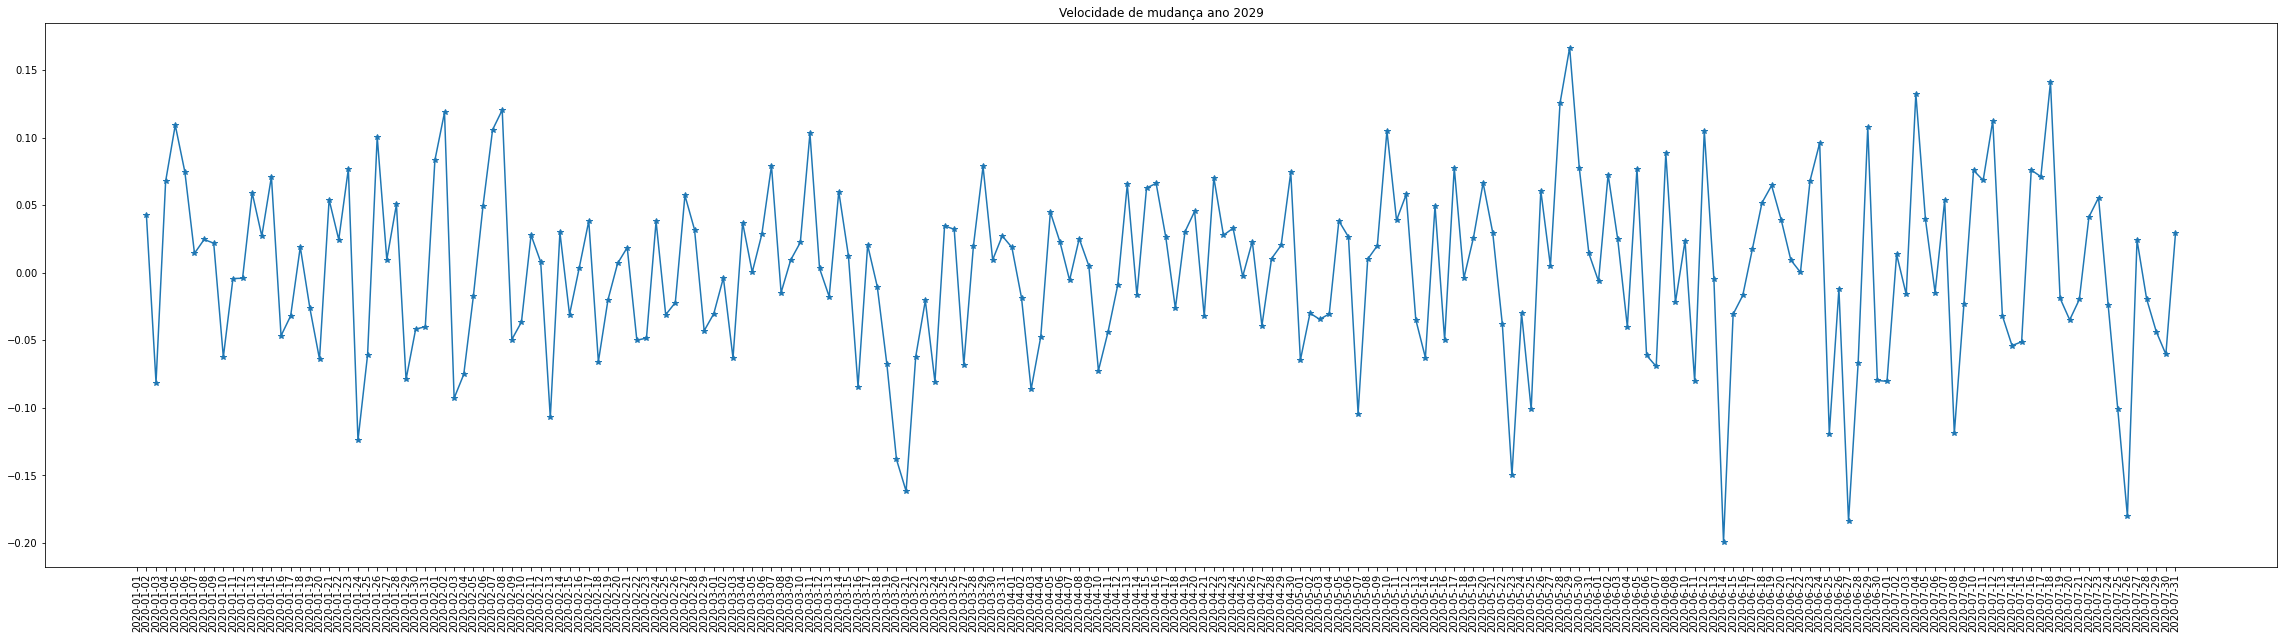

In [1323]:
plt.figure(figsize=(40,10))
plt.title('Velocidade de mudança ano 2029')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
plt.plot(serie_2020_est.diff(),'*-');
plt.show()

# Verificando variação nos dados - aceleração de mudança

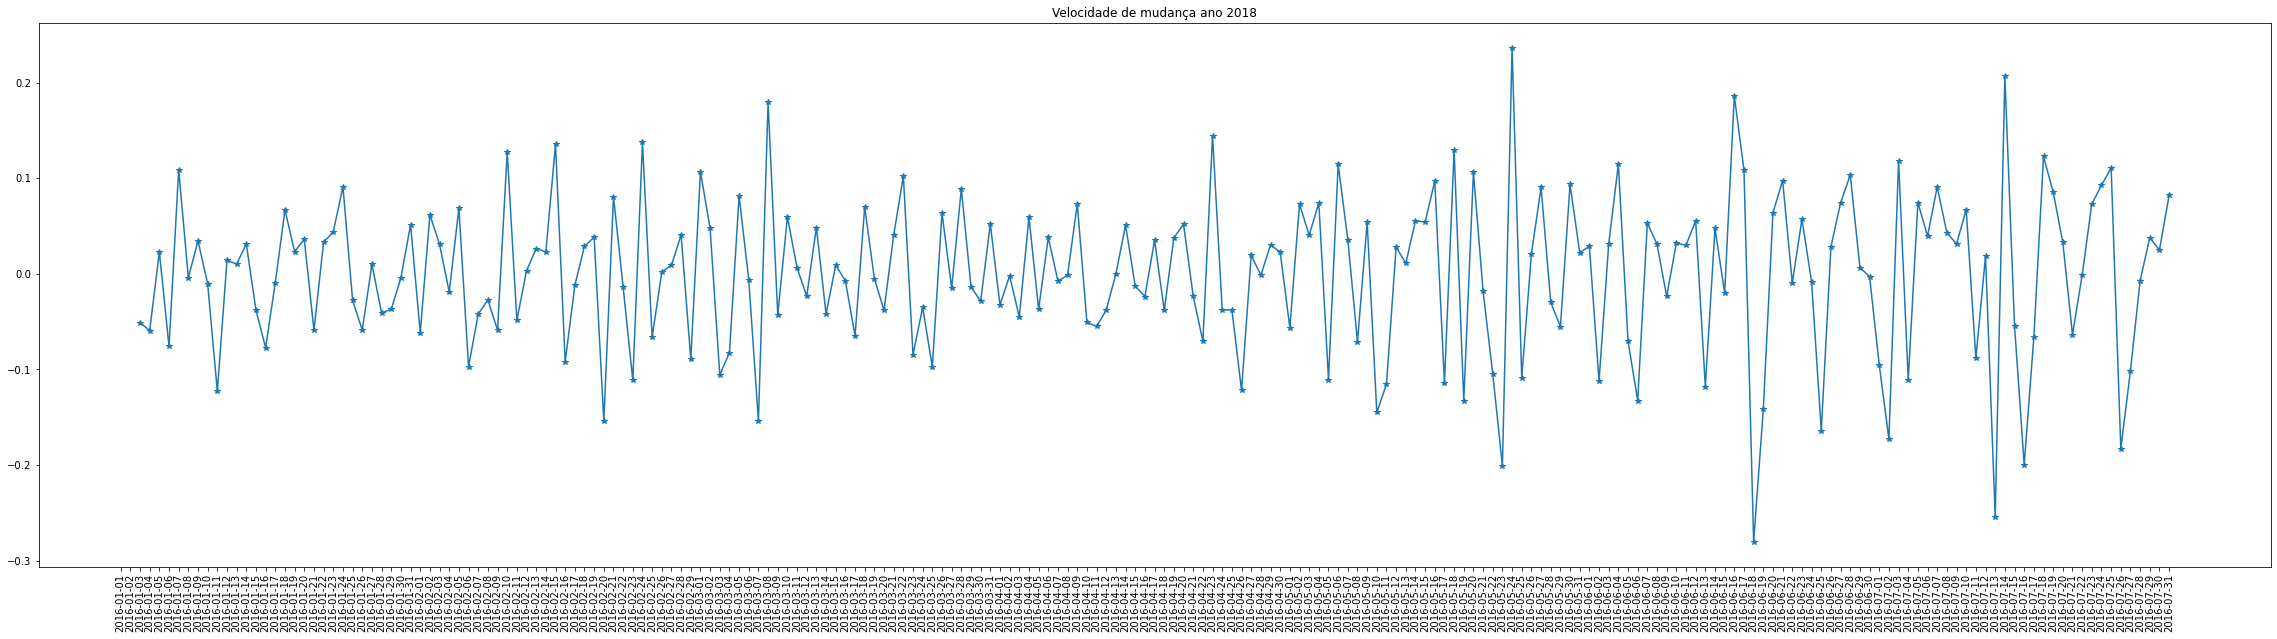

In [1324]:
plt.figure(figsize=(40,10))
plt.title('Velocidade de mudança ano 2018')
velocidade_2016 = serie_2016_est.diff()
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2016.values],rotation=90)
plt.plot(velocidade_2016.diff(),'*-');
plt.show()

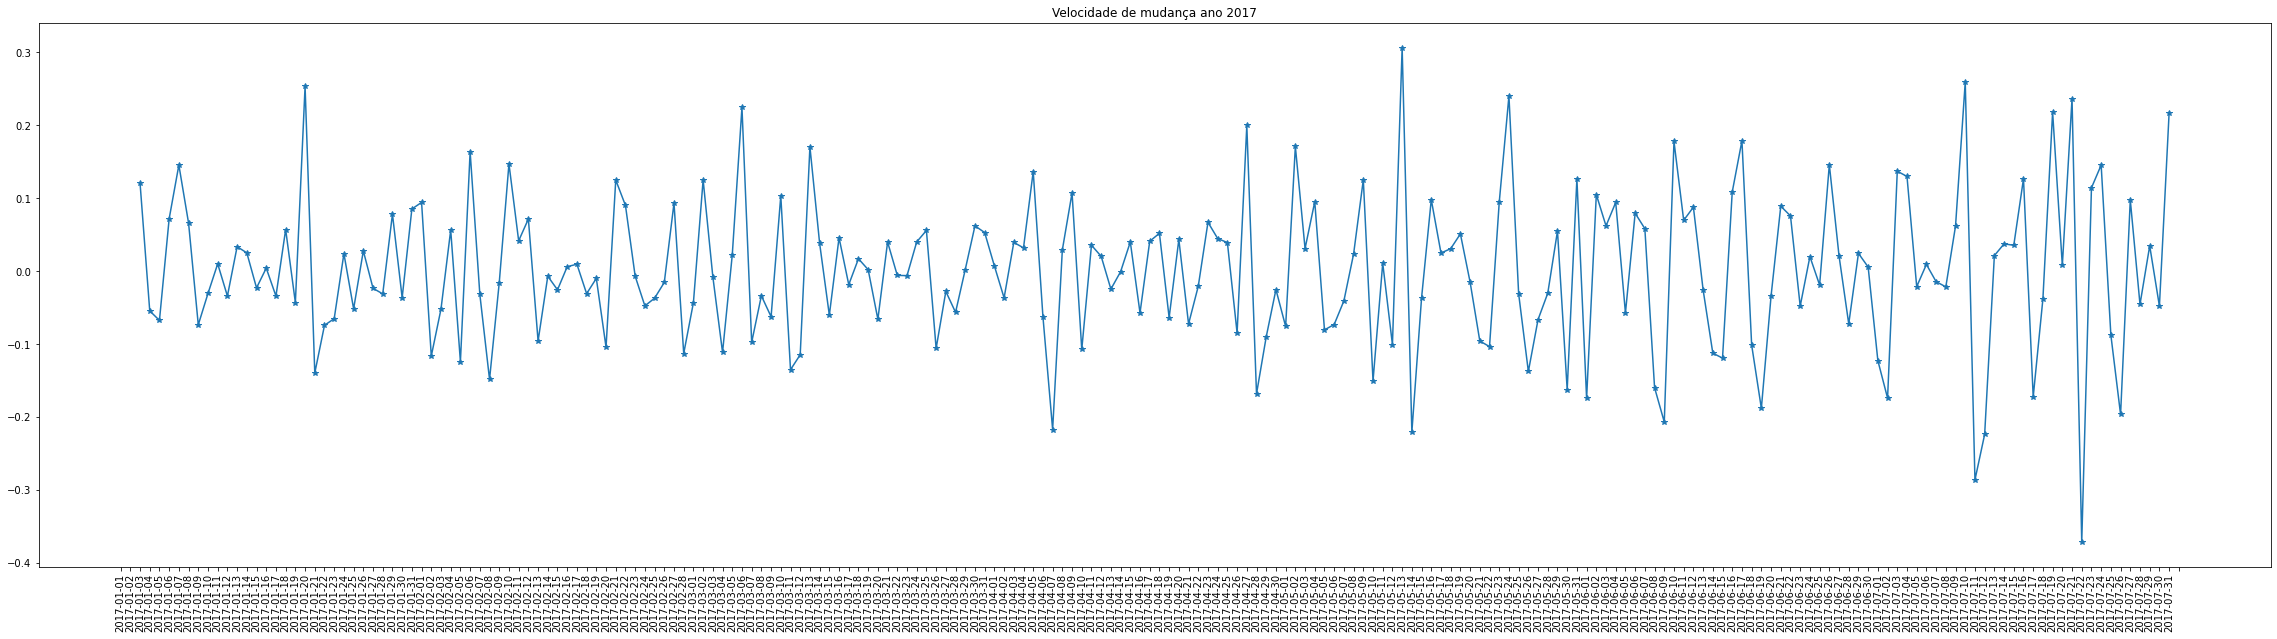

In [1325]:
plt.figure(figsize=(40,10))
plt.title('Velocidade de mudança ano 2017')
velocidade_2017 = serie_2017_est.diff()
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2017.values],rotation=90)
plt.plot(velocidade_2017.diff(),'*-')
plt.show()

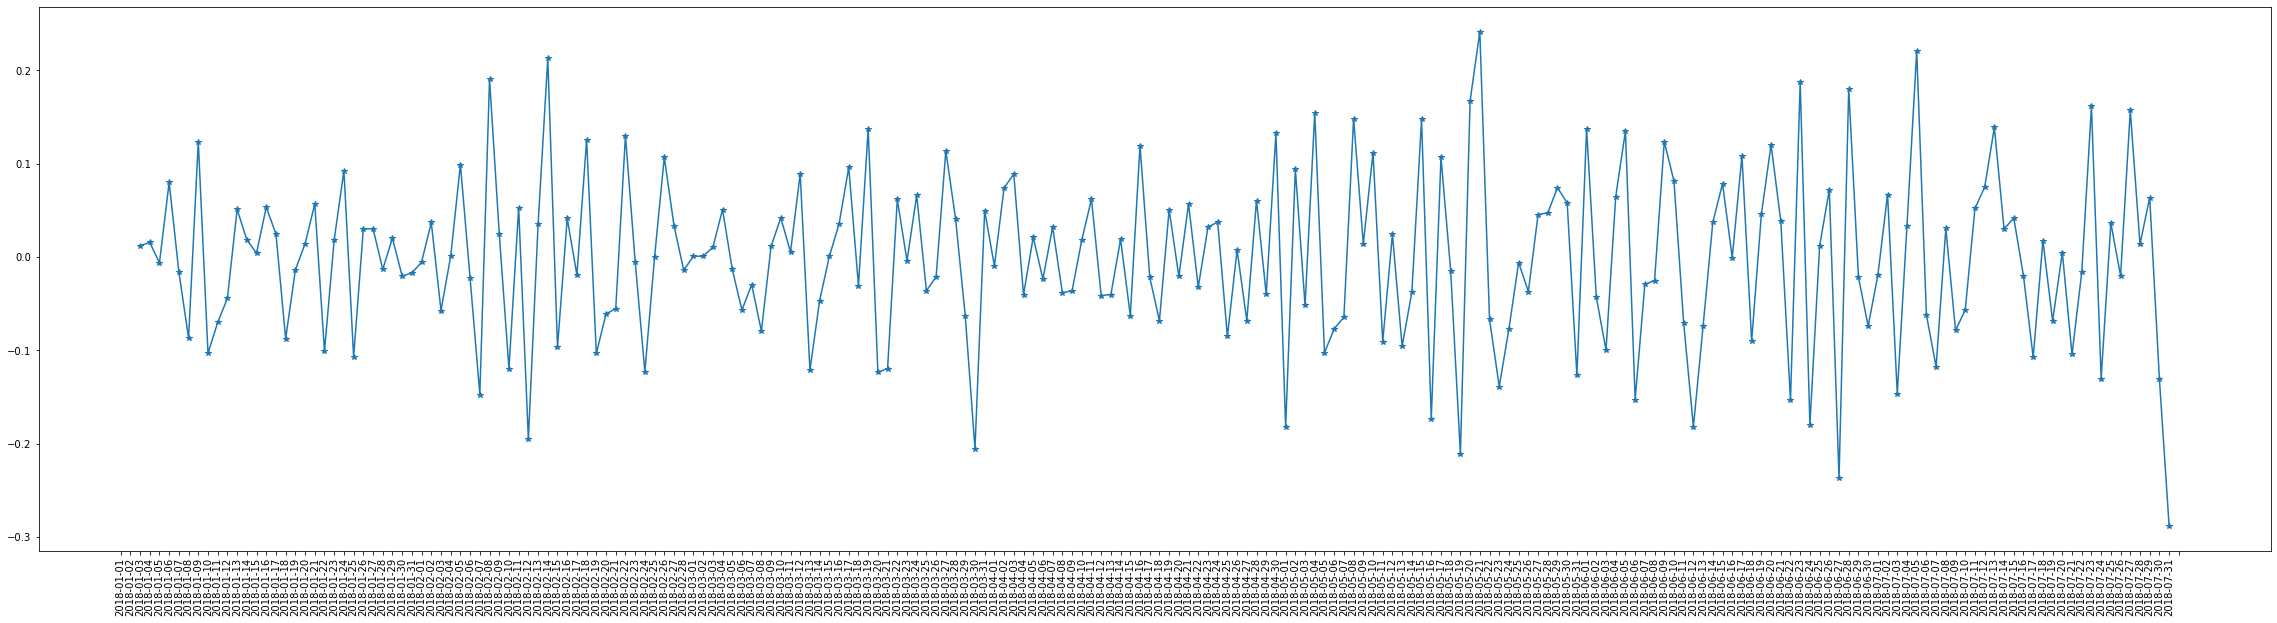

In [1326]:
plt.figure(figsize=(40,10))
velocidade_2018 = serie_2018_est.diff()
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2018.values],rotation=90)
plt.plot(velocidade_2018.diff(),'*-');
plt.show()

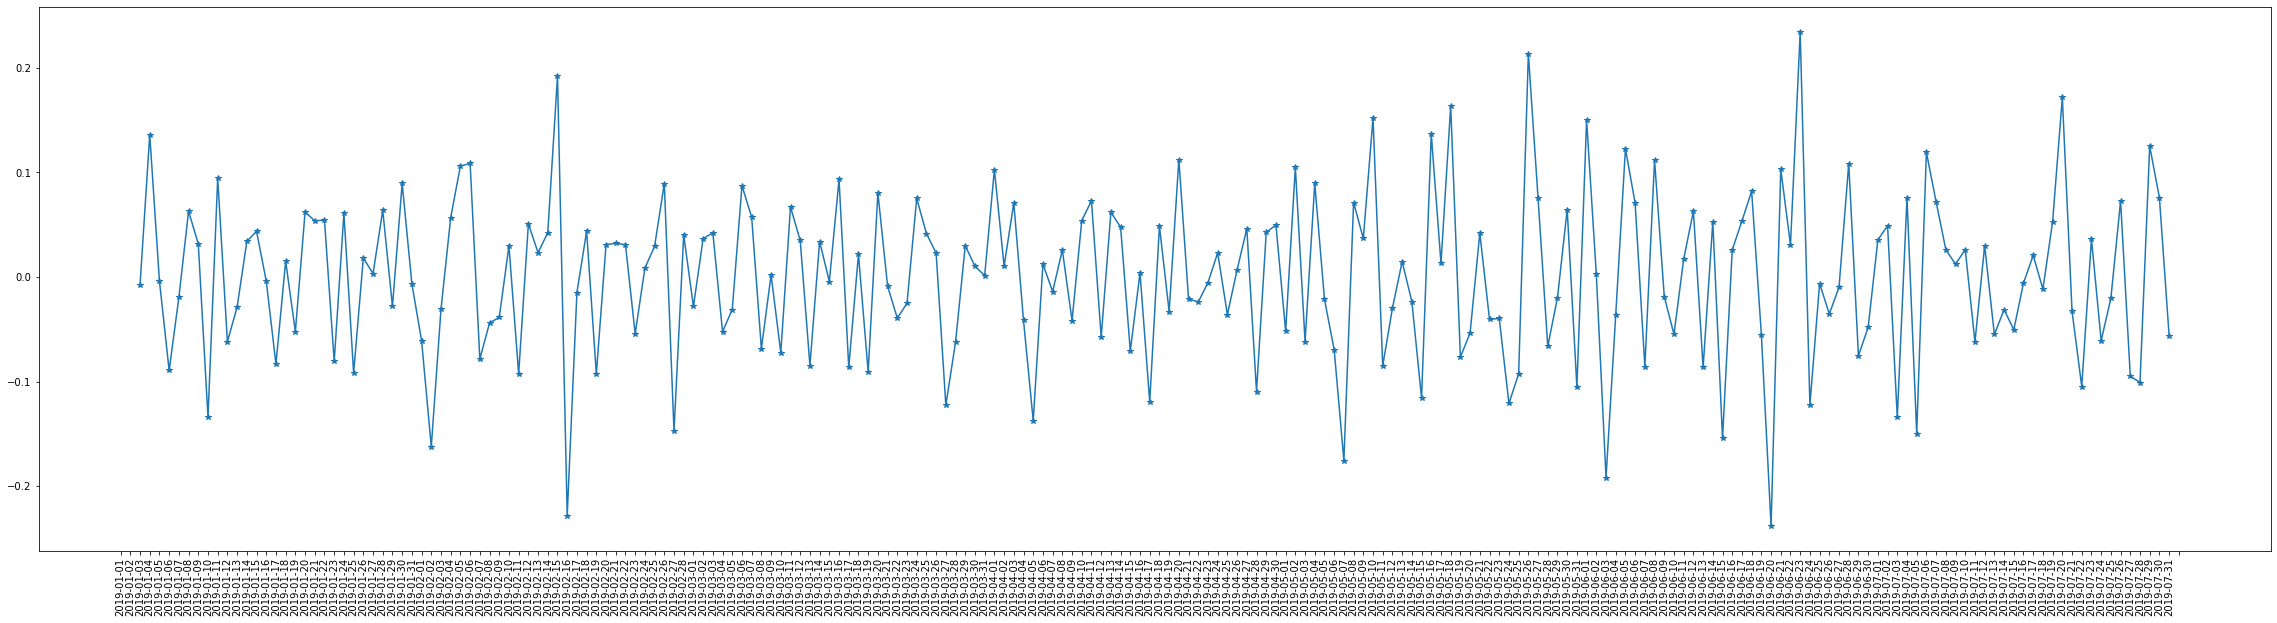

In [1327]:
plt.figure(figsize=(40,10))
velocidade_2019 = serie_2019_est.diff()
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2019.values],rotation=90)
plt.plot(velocidade_2019.diff(),'*-');
plt.show()

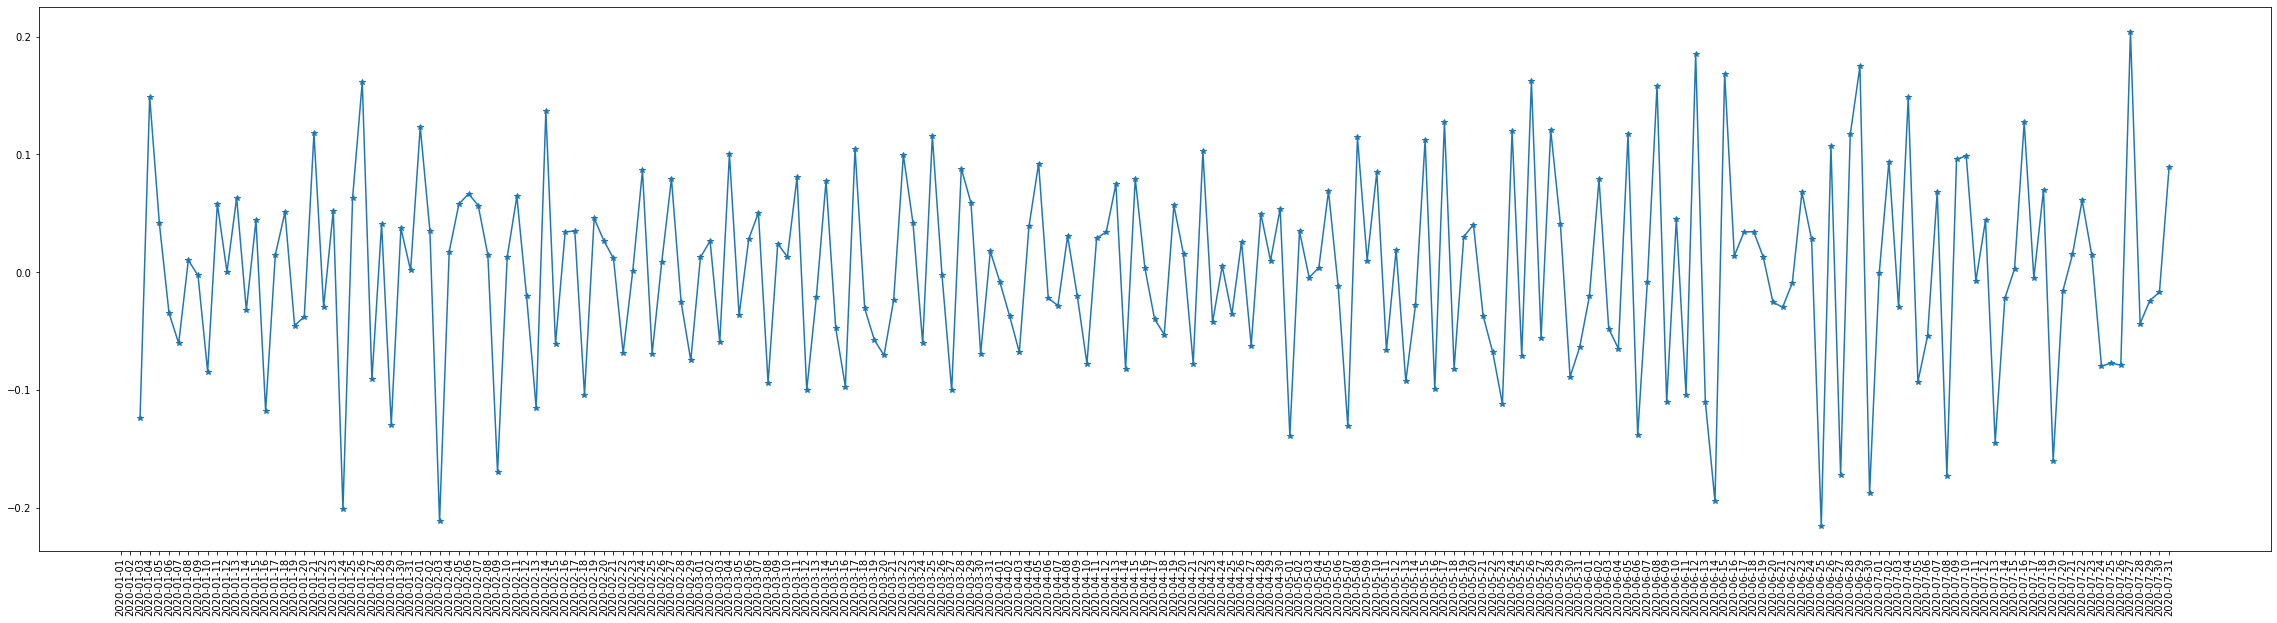

In [1328]:
plt.figure(figsize=(40,10))
velocidade_2020 = serie_2020_est.diff()
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
plt.plot(velocidade_2020.diff(),'*-')
plt.show()

# Autocorrelação da série

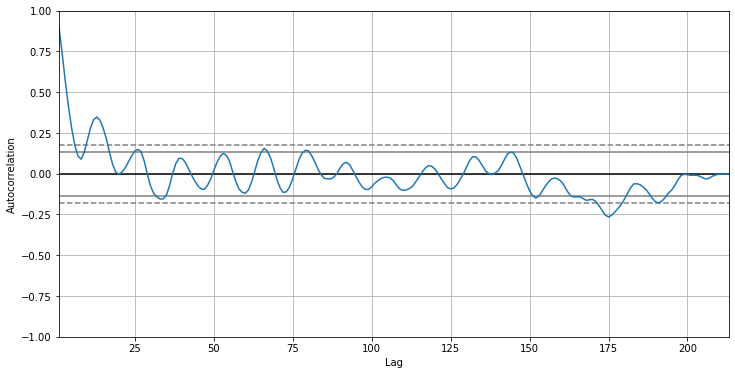

In [1329]:
plt.figure(figsize=(12,6))
autocorrelation_plot(serie_2016_est);

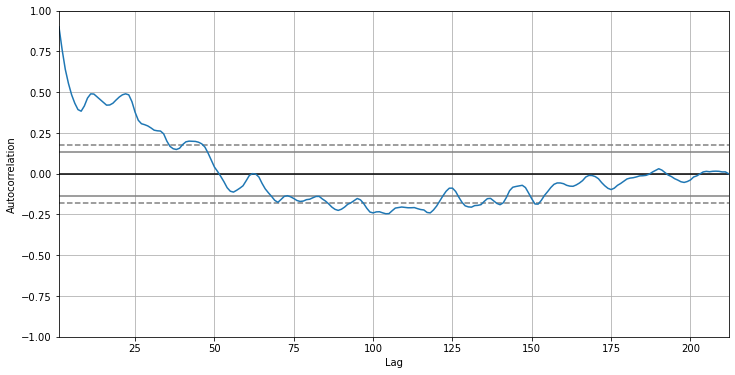

In [1330]:
plt.figure(figsize=(12,6))
autocorrelation_plot(serie_2017_est)

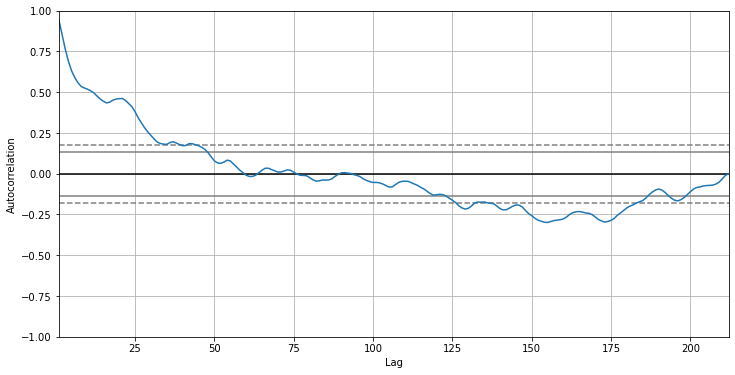

In [1331]:
plt.figure(figsize=(12,6))
autocorrelation_plot(serie_2018_est)

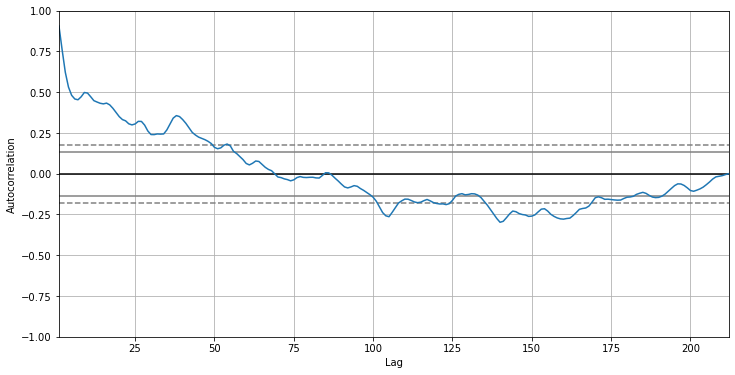

In [1332]:
plt.figure(figsize=(12,6))
autocorrelation_plot(serie_2019_est)

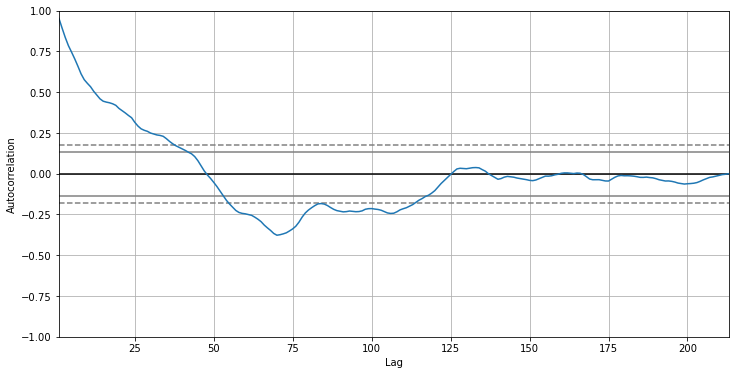

In [1333]:
plt.figure(figsize=(12,6))
autocorrelation_plot(serie_2020_est)

# Parte 2: Juntando os dados

In [1334]:
serie_completa = serie_2016_est
serie_completa = serie_completa.append(serie_2017_est)
serie_completa = serie_completa.append(serie_2018_est)
serie_completa = serie_completa.append(serie_2019_est)
serie_completa = serie_completa.append(serie_2020_est)
serie_completa.reset_index(drop=True,inplace=True)
serie_completa

0
0     0.568497
1     0.686668
2     0.753772
3     0.761457
4     0.792002
...        ...
1057  0.785528
1058  0.766016
1059  0.722376
1060  0.661901
1061  0.690969

[1062 rows x 1 columns]

# Etapa 1: Teste estácionário da série comples

In [1335]:
p_value = teste_estacionariedade(serie_completa)

Resultados do teste Dickey Fuller:
Teste estatístico(t stat)         -3.789657
p-value                            0.003015
#Lags Usados                       8.000000
Número de observações usadas    1053.000000
Valores críticos (1%)             -3.436575
Valores críticos (5%)             -2.864289
Valores críticos (10%)            -2.568234
dtype: float64


# Etapa 3: Decompondo a série

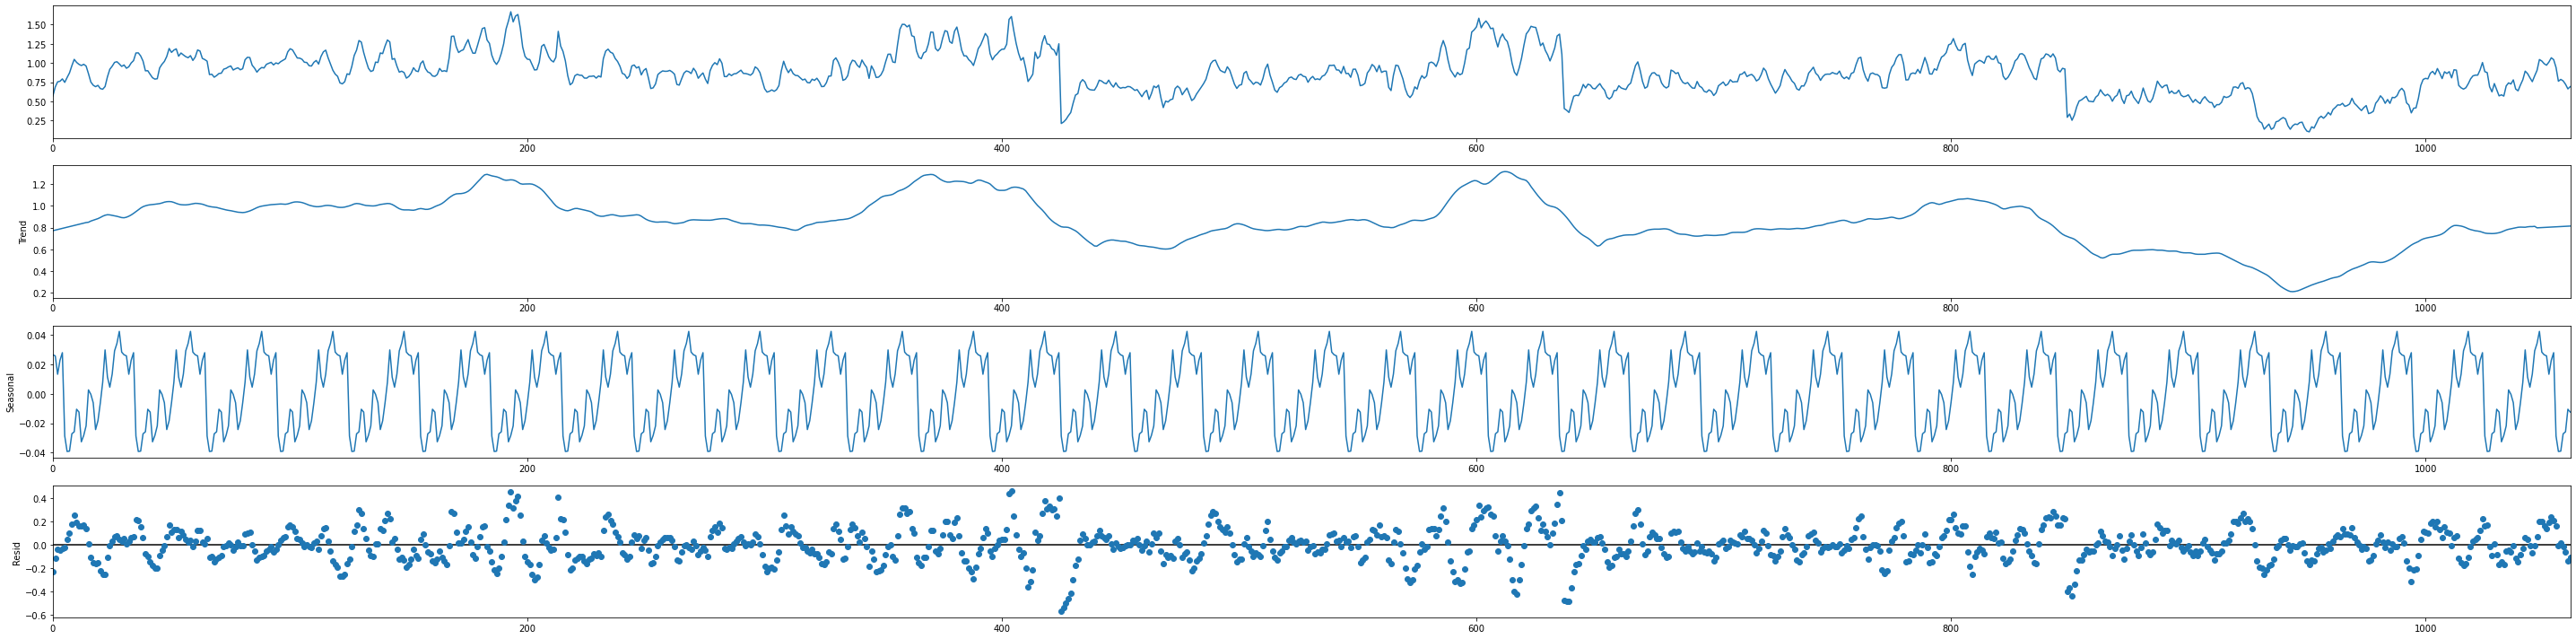

In [1336]:
resultado = seasonal_decompose(serie_completa, model='additive',period=30, extrapolate_trend='freq')
resultado.plot();
tendencia = resultado.trend

# Etapa 4: Autocorrelação para verificar a periodicidade e sazonalidade da série

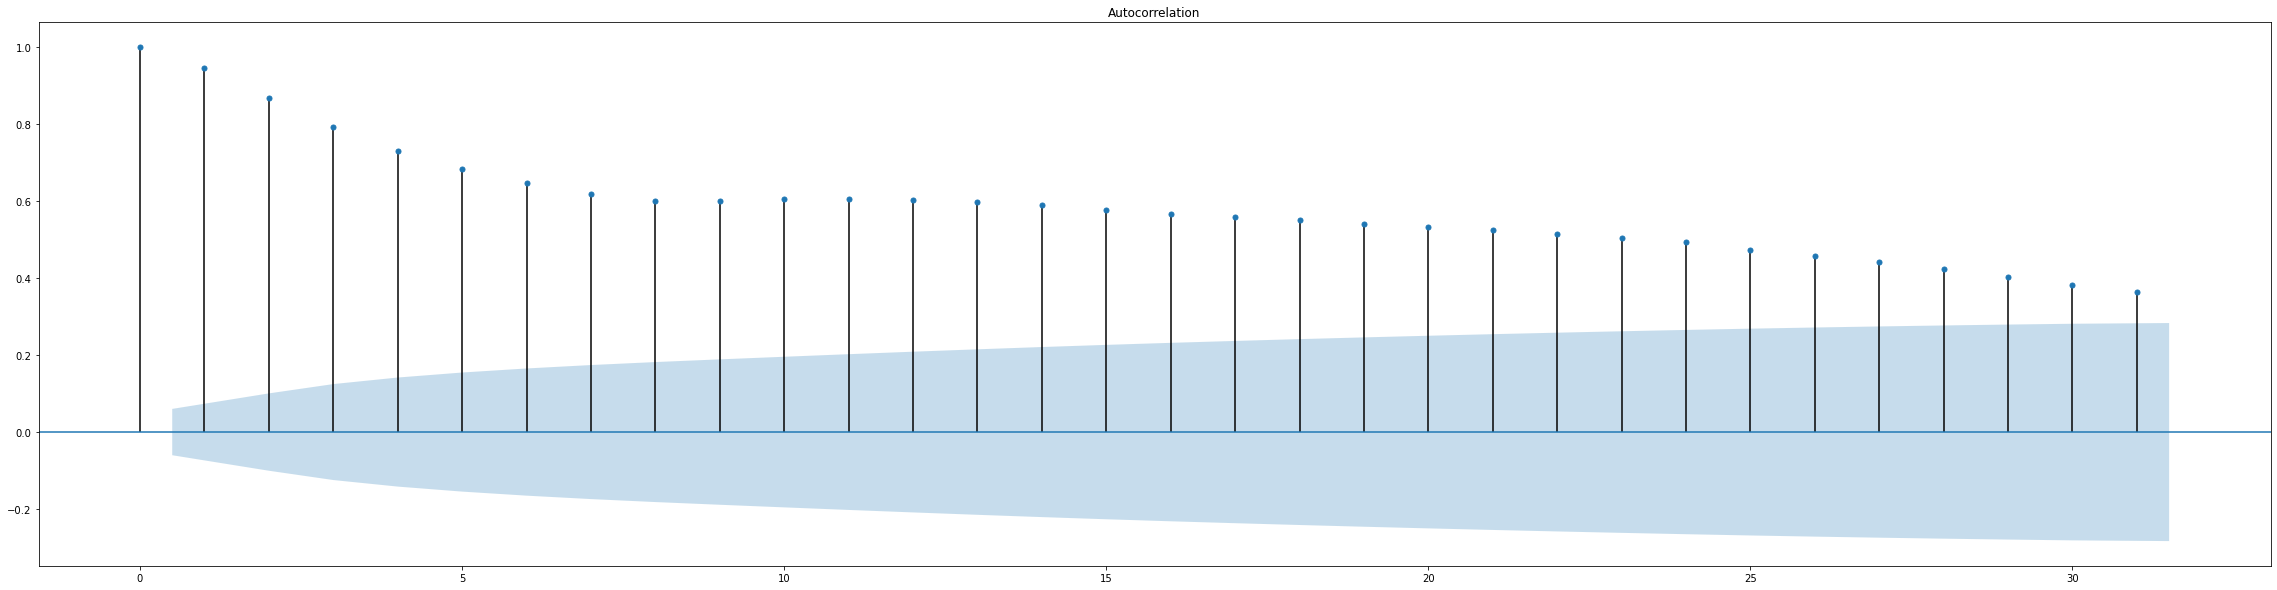

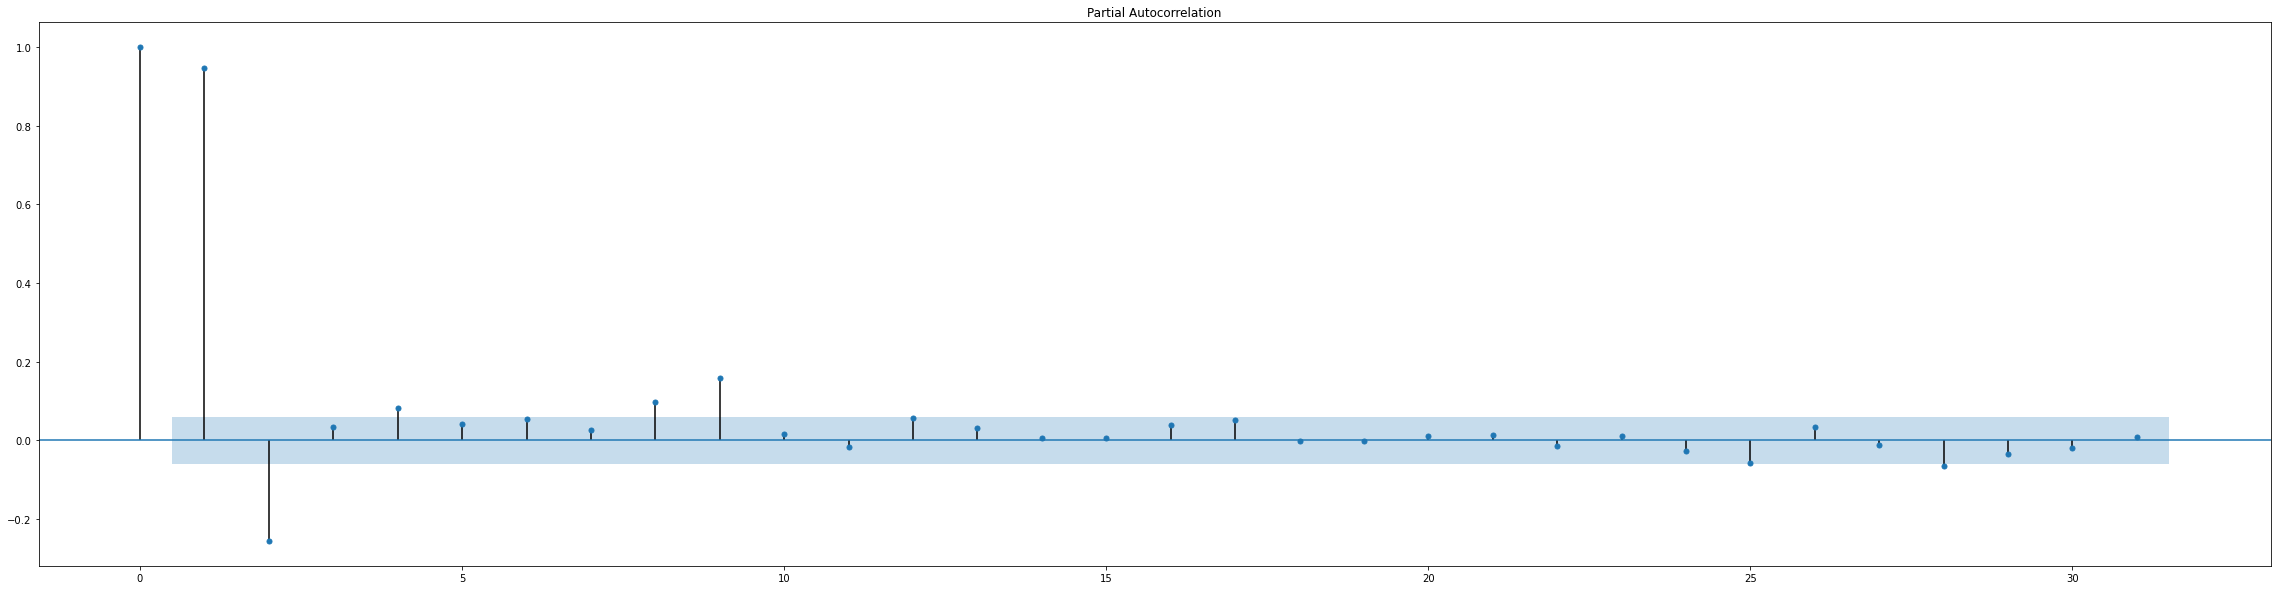

In [1337]:
plot_acf(serie_completa);
plot_pacf(serie_completa);

# Etapa 5: Verificando variação nos dados - velocidade de mudança

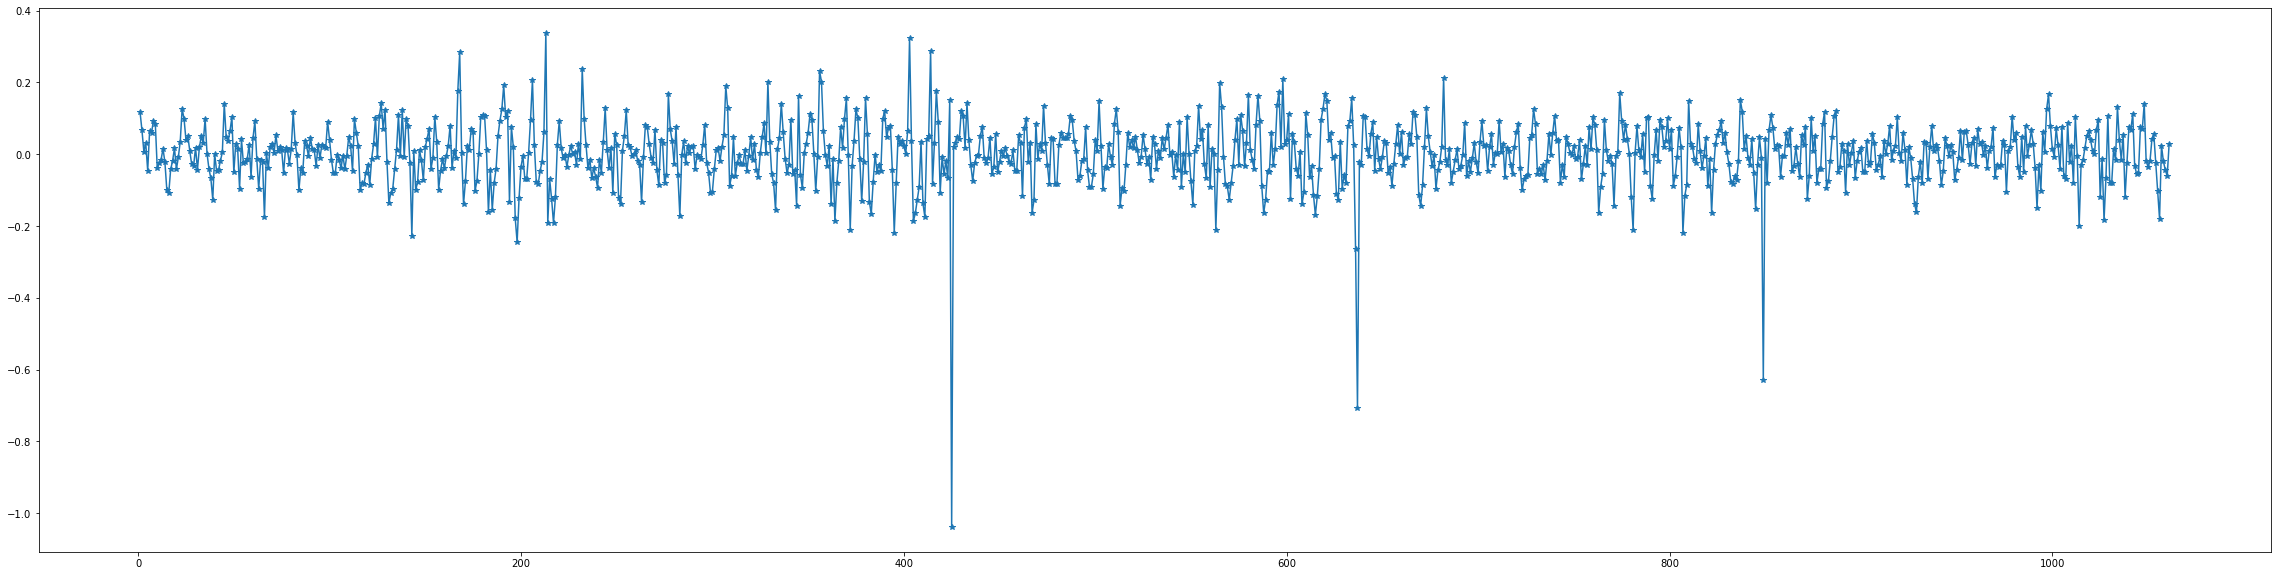

In [1338]:
plt.figure(figsize=(40,10))
plt.plot(serie_completa.diff(),'*-');

# Etapa 6: Verificando variação nos dados - aceleração de mudança

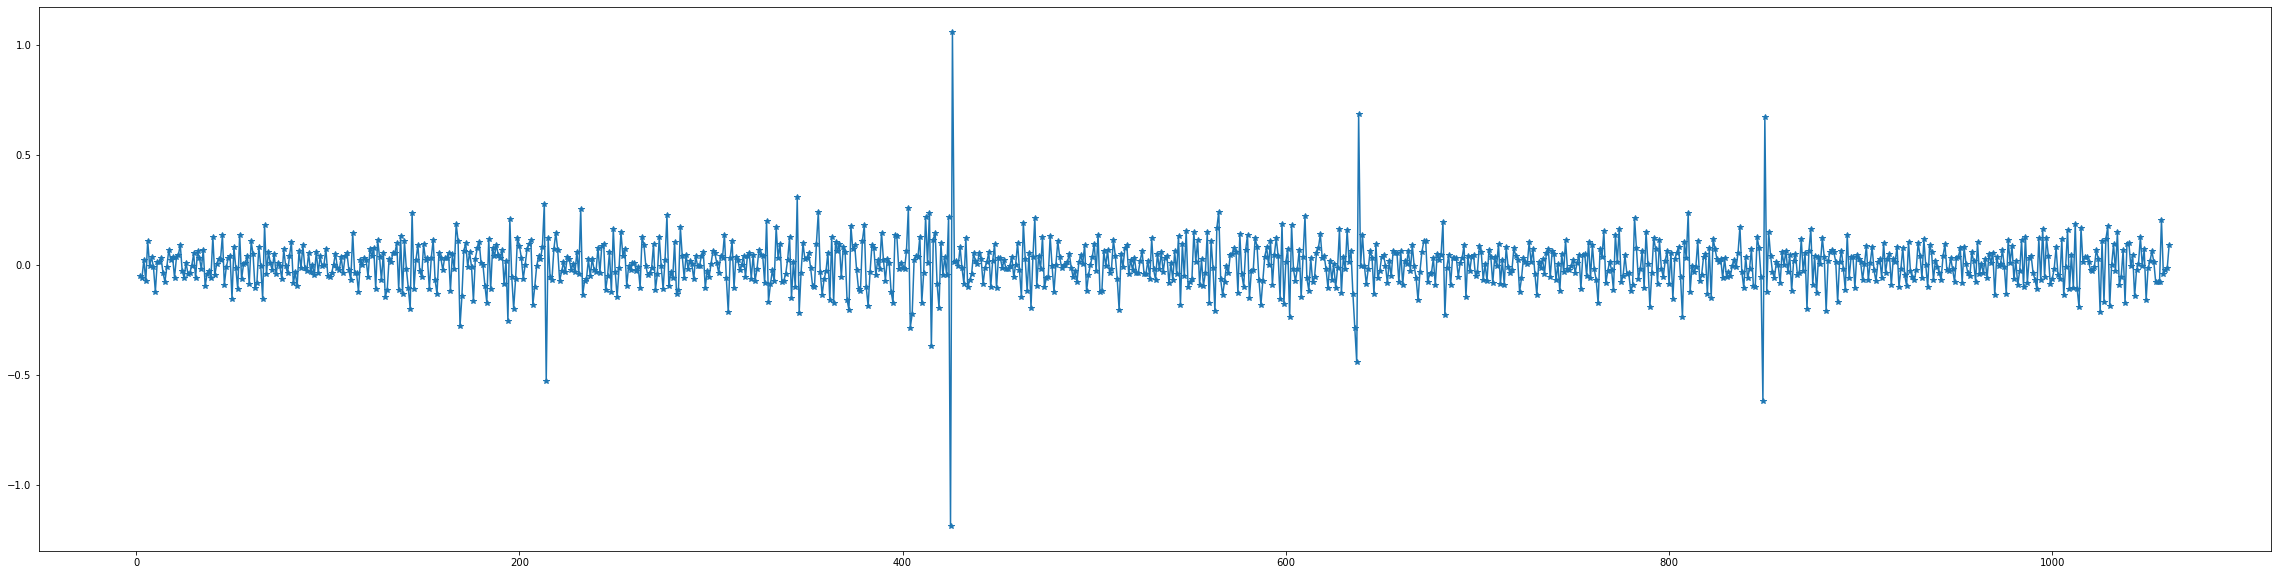

In [1339]:
plt.figure(figsize=(40,10))
plt.plot(serie_completa.diff().diff(),'*-')

# Etapa 7: Autocorrelação da série

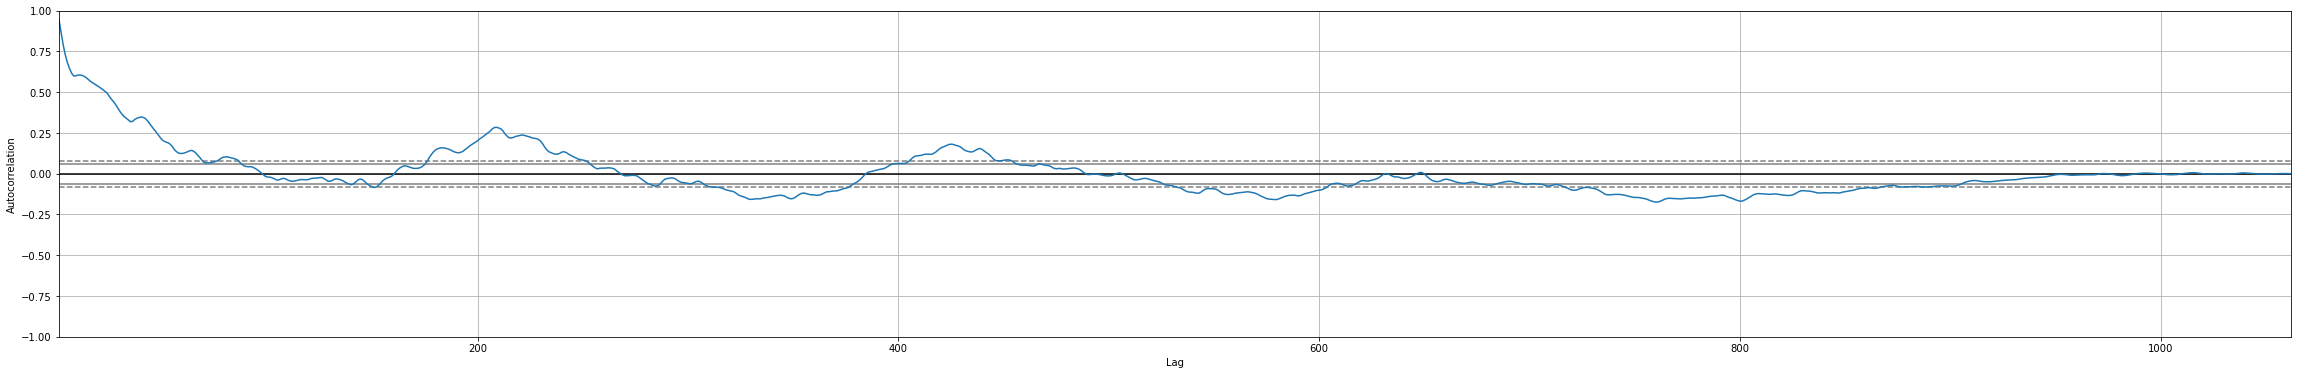

In [1340]:
plt.figure(figsize=(40,6))
autocorrelation_plot(serie_completa)

# Calculando a média mensal das séries

In [1341]:
serie_completa_mensal = pd.DataFrame(columns=['2016','2017','2018','2019','2020'])

serie_completa_mensal['2016'] = serie_2016_est.values[:212,0].tolist()
serie_completa_mensal['2017'] = serie_2017_est.values[:,0].tolist()
serie_completa_mensal['2018'] = serie_2018_est.values[:212,0].tolist()
serie_completa_mensal['2019'] = serie_2019_est.values[:,0].tolist()
serie_completa_mensal['2020'] = serie_2020_est.values[:212,0].tolist()

serie_completa_mensal

2016      2017      2018      2019      2020
0    0.568497  1.411256  0.211040  0.405176  0.291823
1    0.686668  1.220134  0.231456  0.383921  0.334426
2    0.753772  1.150188  0.263882  0.354987  0.253041
3    0.761457  1.025996  0.311981  0.462183  0.320655
4    0.792002  0.834485  0.353760  0.565467  0.429862
..        ...       ...       ...       ...       ...
207  1.241006  1.240027  1.103922  1.065478  0.761470
208  1.164209  1.185841  1.195599  0.911612  0.785528
209  1.080232  1.166509  1.351023  0.882901  0.766016
210  1.033969  1.099498  1.375577  0.929948  0.722376
211  1.012499  1.249729  1.111849  0.920827  0.661901

[212 rows x 5 columns]

In [1342]:
media_mensal = pd.DataFrame(columns=['2016','2017','2018','2019','2020'])
for j in range(7):
    messes = pd.DataFrame(columns=['2016','2017','2018','2019','2020'])
    for i in range(29):
        messes = messes.append(serie_completa_mensal.iloc[29*j+i],ignore_index=True)
    media_mensal = media_mensal.append(messes.mean(axis='rows'),ignore_index=True)

media_mensal

2016      2017      2018      2019      2020
0  0.839161  0.944731  0.619715  0.618384  0.517549
1  1.014487  0.851844  0.601735  0.791174  0.584694
2  0.967588  0.877937  0.822565  0.758283  0.486163
3  1.034200  0.775343  0.807880  0.789623  0.251252
4  1.013691  0.976433  0.861912  0.881407  0.486239
5  0.967555  1.279495  0.918252  1.022423  0.758641
6  1.268402  1.146120  1.313961  0.983292  0.790036

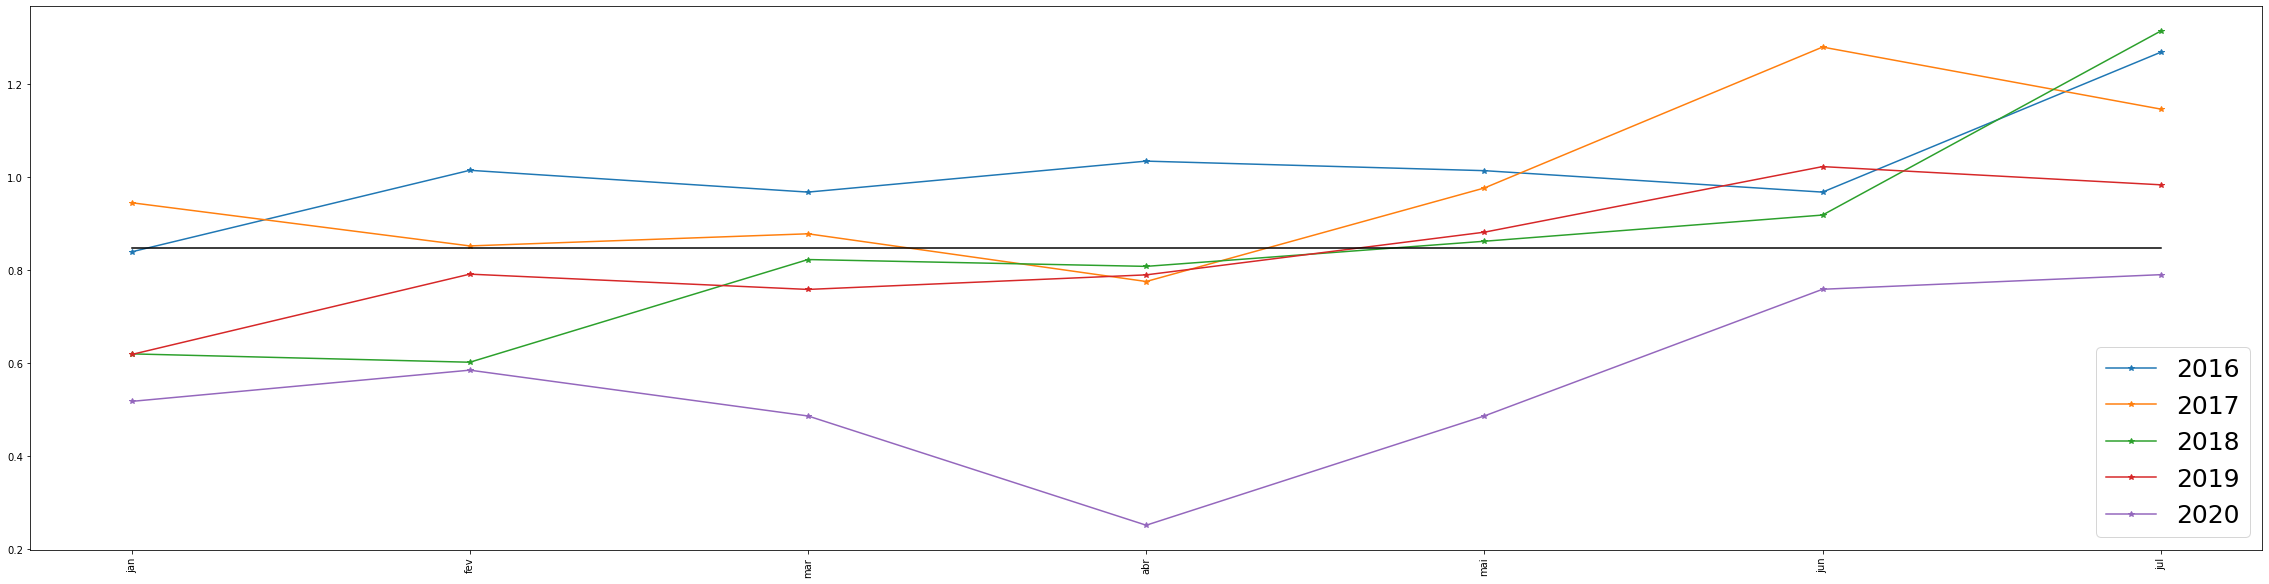

In [1343]:
messes = pd.DataFrame({'Mes':[]})
for i in ['jan','fev','mar','abr','mai','jun','jul']:
    messes = messes.append({"Mes":str(i)},ignore_index=True)


plt.figure(figsize=(40,10))
plt.plot(media_mensal,'*-')
plt.plot([i for i in range(media_mensal.shape[0])],[media_mensal.mean().mean() for i in range(media_mensal.shape[0])],'k-')

plt.xticks([i for i in range(messes.shape[0])],[i[0] for i in messes.values],rotation=90)
plt.legend(media_mensal.columns.values,fontsize=25)
plt.show()

No handles with labels found to put in legend.


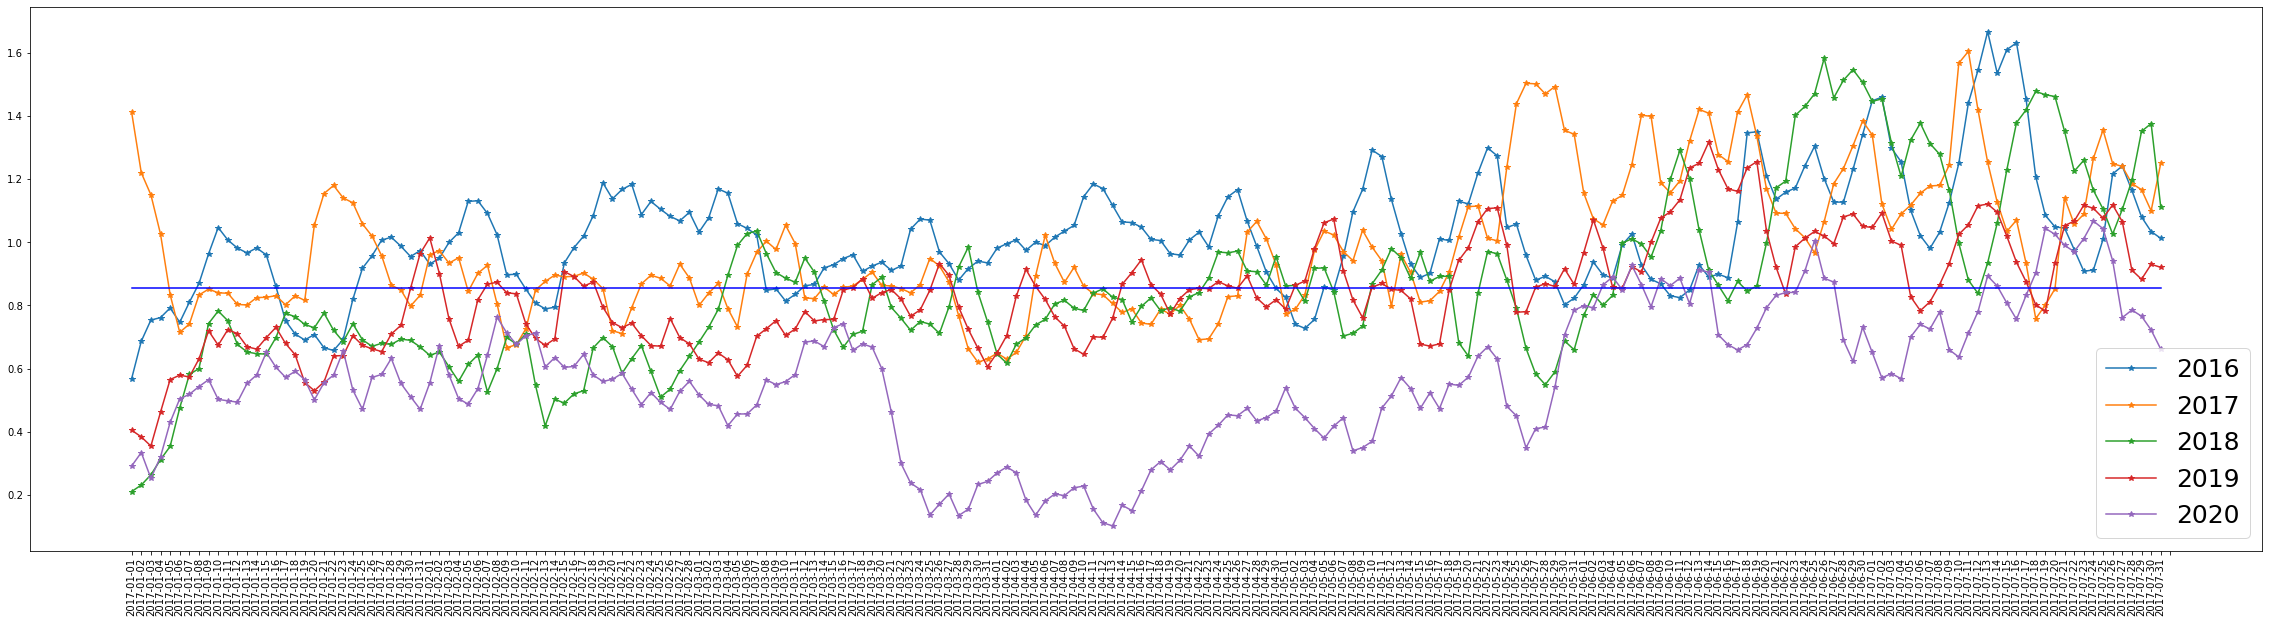

In [1344]:
plt.figure(figsize=(40,10))
plt.plot(serie_completa_mensal,'*-')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2017.values],rotation=90)
plt.legend(loc='best')
plt.legend(serie_completa_mensal.columns.values,fontsize=25)
plt.plot([i for i in range(serie_completa_mensal.shape[0])],[serie_completa_mensal.mean().mean() for i in range(serie_completa_mensal.shape[0])],'b-')
plt.show()

<div style='border-top: 10px solid black;'></div>